## Phase 2: Geographic Datasets
These outputs will provide information on local areas, 2013 area units, and statistical area 2 units, and 2018 Meshblocks.
### Outputs
Four csv files: 
- Local Area dataset 
- 2018 SA2 dataset 
- 2013 AU dataset 
- 2018 Meshblock dataset 
Note: only geographic areas within Auckland region are necessary.


In [1]:
#pragma nodebook off
#Use nodebook for better reproducibility https://github.com/uoa-eResearch/nodebook
%reload_ext nodebook.ipython
%nodebook disk phase2

<IPython.core.display.Javascript object>

## Local area dataset

1.	Name (string is fine) Name

In [ ]:
# load libraries
import geopandas as gpd # vector data
import contextily as ctx # Used for contextual basemaps
import pandas as pd # tabular data, loading CSVs
import numpy as np # numeric data
from util import *
import matplotlib.pyplot as plt # plotting
from tqdm.auto import tqdm # progress bars
tqdm.pandas()
import json
from shapely.geometry import Point, shape # creating points
import requests # web requests
from pprint import pprint
plt.rcParams['figure.figsize'] = (20, 20)

In [ ]:
ls()

name  \
0                 2013-mb-dataset-Total-New-Zealand-Household.csv   
1        2018-census-electoral-population-meshblock-2020-data.csv   
2                    Geocoordinates_Direct_Transit_stops_AKL.xlsx   
3             Household_income_2018_census_by_2018_meshblock.xlsx   
4                                      MASTER_UP_BaseZone_SHP.zip   
5                               Modified_Community_Boards_SHP.zip   
6                  kx-nz-state-highway-on-ramps-off-ramps-SHP.zip   
7       lds-nz-coastlines-and-islands-polygons-topo-150k-FGDB.zip   
8                                 lds-nz-primary-parcels-FGDB.zip   
9   statsnzmeshblock-higher-geographies-2018-generalised-FGDB.zip   
10            statsnzpopulation-by-meshblock-2013-census-FGDB.zip   

    filesize (MB)              last modified  
0           37.12 2014-06-04 10:56:30.000000  
1            5.60 2021-08-09 00:39:18.000000  
2            0.01 2020-10-08 07:52:29.000000  
3            0.43 2021-07-12 14:30:28.000000  
4           66.92 2021-07-19 02:23:51.137347  
5            1.30 2021-07-19 02:16:07.650000  
6            0.14 2021-08-25 09:52:06.341291  
7            4.25 2021-08-05 15:57:49.020000  
8           79.03 2021-08-12 09:13:27.910000  
9           34.54 2021-08-05 14:53:54.350000  
10          82.11 2021-07-19 13:53:55.150631

Total: 311.0MB


In [ ]:
df = gpd.read_file("input/Modified_Community_Boards_SHP.zip")
df.OBJECTID = df.OBJECTID.astype(int)
df = df.set_index("OBJECTID", drop=True)
df = df.sort_index()
display(df)

Local_Area  \
OBJECTID                                     
1                         Auckland Central   
2         Beach Haven-Birkenhead-Northcote   
3                                   Botany   
4                       Devonport-Takapuna   
5                          East Coast Bays   
6                Franklin-Beachlands-Hunua   
7                        Franklin-Pukekohe   
8                          Franklin-Waiuku   
9                         Henderson-Massey   
10                          Hibiscus Coast   
11                                  Howick   
12                         Mangere-Otahuhu   
13                                Manurewa   
14                            Maungakiekie   
15                               Mt Albert   
16                                 Mt Eden   
17                                  Orakei   
18                                   Otara   
19                               Pakuranga   
20                                Papakura   
21                              Papatoetoe   
22                              Puketapapa   
23                       Rodney-Dairy Flat   
24                      Rodney-Helensville   
25                  Rodney-Kumeu-Riverhead   
26                        Rodney-Warkworth   
27                        Rodney-Wellsford   
28                                  Tamaki   
29                               Titirangi   
30          Upper Harbour Local Board Area   
31                                 Waiheke   
32                               Waitakere   
33                                    Whau   

                                                   geometry  
OBJECTID                                                     
1         POLYGON ((1755802.315 5921956.091, 1755861.443...  
2         POLYGON ((1757287.966 5925962.738, 1757211.333...  
3         POLYGON ((1770748.846 5912611.168, 1770889.893...  
4         POLYGON ((1755276.581 5932026.336, 1755278.305...  
5         POLYGON ((1756125.006 5940268.048, 1756139.852...  
6         MULTIPOLYGON (((1804302.354 5890738.079, 17905...  
7         POLYGON ((1765085.620 5897344.807, 1765096.229...  
8         POLYGON ((1744829.308 5899882.633, 1744835.760...  
9         POLYGON ((1745963.138 5923457.510, 1745945.884...  
10        MULTIPOLYGON (((1752023.352 5954803.281, 17520...  
11        POLYGON ((1771447.460 5916900.636, 1771474.703...  
12        MULTIPOLYGON (((1766142.746 5910838.845, 17661...  
13        POLYGON ((1769432.488 5904664.673, 1769471.312...  
14        POLYGON ((1759418.674 5915517.660, 1759596.351...  
15        POLYGON ((1756291.061 5918265.104, 1756266.530...  
16        POLYGON ((1751910.995 5920299.659, 1751917.632...  
17        POLYGON ((1759833.395 5920429.502, 1759837.143...  
18        MULTIPOLYGON (((1765765.640 5909501.655, 17657...  
19        POLYGON ((1769523.742 5920466.582, 1769527.337...  
20        POLYGON ((1772188.699 5902202.011, 1772192.566...  
21        POLYGON ((1765105.421 5908611.893, 1765113.661...  
22        POLYGON ((1753132.892 5915040.177, 1753141.101...  
23        POLYGON ((1746055.938 5948651.765, 1746067.112...  
24        MULTIPOLYGON (((1710567.626 5967865.416, 17106...  
25        POLYGON ((1742532.808 5931237.574, 1742490.377...  
26        MULTIPOLYGON (((1761692.564 5984690.018, 17617...  
27        MULTIPOLYGON (((1746318.204 6000215.757, 17464...  
28        POLYGON ((1765594.677 5917986.938, 1765609.808...  
29        POLYGON ((1749038.038 5910572.842, 1749034.230...  
30        MULTIPOLYGON (((1743880.554 5928979.708, 17438...  
31        MULTIPOLYGON (((1793981.864 5931917.843, 17940...  
32        MULTIPOLYGON (((1743890.310 5905057.188, 17438...  
33        MULTIPOLYGON (((1748168.244 5916597.058, 17481...

In [ ]:
df = df.rename(columns={"Local_Area": "Name"})

2.	Centroid longitude Centroid_lon
3.	Centroid latitude Centroid_lat
4.	Area  (land only) Area

In [ ]:
df["Centroid_lon"] = df.centroid.to_crs(epsg=4326).x
df["Centroid_lat"] = df.centroid.to_crs(epsg=4326).y
df["Area"] = df.area

5.	Area zoned Residential under AUP Residential_area
6.	Area zoned Residential - Single House under AUP SH_area
7.	Area zoned Residential - Mixed Housing Suburban under AUP MHS_area
8.	Area zoned Residential - Mixed Housing Urban under AUP MHU_area
9.	Area zoned Residential - Terrace Housing and Apartments under AUP THA_area
10.	Area zoned Residential – Large Lot under AUP LL_area
11.	Area zoned Future Urban under AUP FU_area 
12.	Area zones Hauraki Gulf Islands under AUP HGI_area
13.	Area zoned Business under AUP Business_area
14.	Area zoned Rural under AUP Rural Rural_area

In [ ]:
%%time
zones = gpd.read_file("input/MASTER_UP_BaseZone_SHP.zip")
zones

CPU times: user 11.9 s, sys: 740 ms, total: 12.7 s
Wall time: 12.6 s


OBJECTID CONTOUR   created_da DocumentUR  \
0            1.0    None  20160718211       None   
1            2.0    None  20160718211       None   
2            3.0    None  20160718211       None   
3            4.0    None  20160718211       None   
4            5.0    None  20160718211       None   
...          ...     ...          ...        ...   
130295  130296.0    None  20161115151       None   
130296  130297.0    None  20161115151       None   
130297  130298.0    None  20161115151       None   
130298  130299.0    None  20161115151       None   
130299  130300.0    None  20161115151       None   

                                      GlobalID GROUPZONE         GROUPZONE_  \
0       {4C8F9436-7EA6-417E-B64F-15FCD44459F6}         2        Residential   
1       {604AAD87-8ED4-4111-8276-47CEE7E81F92}         1  Public Open Space   
2       {8D827DA8-BC5B-437A-B17A-532354F7D037}         4              Rural   
3       {96C9E266-3341-4C71-94F1-325F2EE45732}         2        Residential   
4       {90B50FEE-45A3-4E88-819A-370751ACDE3D}         1  Public Open Space   
...                                        ...       ...                ...   
130295  {B2F0FB45-80F6-41ED-AA57-A914B195B31E}         1  Public Open Space   
130296  {A3F4EF61-9162-43C3-90BD-DC84D93C6A64}         2        Residential   
130297  {A5FC7EB5-76E5-414C-96DD-715C671764B4}         4              Rural   
130298  {C371B83C-35CE-46A1-B94F-F1E592F271F7}         2        Residential   
130299  {31281924-C74D-4038-8260-FE6D886F4C94}         2        Residential   

         last_edite                                         NAME PARCEL_BAS  \
0       20161111010                                         None       None   
1       20161111010                                         None       None   
2       20161111010                                         None       None   
3       20161111010                                         None       None   
4       20161111010                                         None       None   
...             ...                                          ...        ...   
130295  20161115151                                         None       None   
130296  20161115151                                         None       None   
130297  20161115151  Kaipara South Head and Harbour coastal area       None   
130298  20161115151                                         None       None   
130299  20161115151                                         None       None   

        ...  TYPE TYPE_resol VERSIONSTA VERSIONS_1 ZONE  \
0       ...  None       None          4  Operative   60   
1       ...  None       None          4  Operative   33   
2       ...  None       None          4  Operative   11   
3       ...  None       None          4  Operative   23   
4       ...  None       None          4  Operative   31   
...     ...   ...        ...        ...        ...  ...   
130295  ...  None       None          4  Operative   31   
130296  ...  None       None          4  Operative   18   
130297  ...  None       None          4  Operative   46   
130298  ...  None       None          4  Operative    8   
130299  ...  None       None          4  Operative   18   

                                               ZONE_resol ZONEHEIGHT  \
0                  Residential - Mixed Housing Urban Zone        NaN   
1           Open Space - Sport and Active Recreation Zone        NaN   
2                                Rural - Mixed Rural Zone        NaN   
3                            Residential - Large Lot Zone        NaN   
4                          Open Space - Conservation Zone        NaN   
...                                                   ...        ...   
130295                     Open Space - Conservation Zone        NaN   
130296          Residential - Mixed Housing Suburban Zone        NaN   
130297                         Rural - Rural Coastal Zone        NaN   
130298  Residential - Terrace Housing and Apartment Bu..

In [ ]:
zones[pd.isna(zones.ZONE_resol)]

OBJECTID CONTOUR   created_da DocumentUR  \
20853    20854.0    None  20160718211       None   
121765  121766.0    None  20160718211       None   

                                      GlobalID GROUPZONE  \
20853   {2D83F680-9587-4D57-AF0B-CB7CA27C3D2C}         6   
121765  {FD3E8BB4-1979-42B5-9A77-5D04AE5190AF}         6   

                  GROUPZONE_   last_edite  NAME PARCEL_BAS  ...  TYPE  \
20853   Special purpose zone  20161111011  None       None  ...  None   
121765  Special purpose zone  20161111010  None       None  ...  None   

       TYPE_resol VERSIONSTA VERSIONS_1 ZONE ZONE_resol ZONEHEIGHT SHAPE_Leng  \
20853        None          4  Operative   58       None        NaN  72.629617   
121765       None          4  Operative   58       None        NaN  86.135341   

       SHAPE_Area                                           geometry  
20853   22.286945  POLYGON ((1767684.860 5903714.023, 1767691.955...  
121765   4.114962  POLYGON ((1767684.083 5903713.690, 1767666.954...  

[2 rows x 31 columns]

In [ ]:
zones.ZONE_resol = zones.ZONE_resol.fillna("Special")

In [ ]:
zones.GROUPZONE_.value_counts()

General                 52461
Coastal                 42200
Residential             22398
Public Open Space        6667
Business                 3237
Rural                    2750
Special purpose zone      299
New growth                288
Name: GROUPZONE_, dtype: int64

In [ ]:
zones.ZONE_resol.value_counts()

Road                                                         47012
Coastal - General Coastal Marine Zone                        26326
Coastal - Coastal Transition Zone                            15703
Residential - Mixed Housing Suburban Zone                     9775
Residential - Mixed Housing Urban Zone                        5864
Strategic Transport Corridor Zone                             4215
Residential - Single House Zone                               3766
Open Space - Conservation Zone                                3063
Open Space - Informal Recreation Zone                         2926
Residential - Terrace Housing and Apartment Building Zone     2134
Rural - Rural Production Zone                                 1025
Water                                                         1013
Business - Mixed Use Zone                                      782
Rural - Rural Coastal Zone                                     768
Business - Light Industry Zone                                

In [ ]:
# Create a dictionary mapping the first n character of the zone description to the desired variable name
zones_of_interest = {
    "Residential": "Residential_area",
    "Residential - Single House Zone": "SH_area",
    "Residential - Mixed Housing Suburban Zone": "MHS_area",
    "Residential - Mixed Housing Urban Zone": "MHU_area",
    "Residential - Terrace Housing and Apartment Building Zone": "THA_area",
    "Residential - Large Lot Zone": "LL_area",
    "Future Urban Zone": "FU_area",
    "Hauraki Gulf Islands":  "HGI_area",
    "Business": "Business_area",
    "Rural": "Rural_area",
    "Open Space": "Open_area"
}

In [ ]:
%%time
for k,v in tqdm(zones_of_interest.items()):
    subset = zones[zones.ZONE_resol.str.startswith(k)] # Just the matched zones (residential, business, rural etc)
    print(k, len(subset))
    clipped = gpd.clip(df, subset) # Clip the local areas to the matched zones
    df[v] = clipped.area # Store the resulting area. Unit is m²

  0%|          | 0/11 [00:00<?, ?it/s]

Residential 22398
Residential - Single House Zone 3766
Residential - Mixed Housing Suburban Zone 9775
Residential - Mixed Housing Urban Zone 5864
Residential - Terrace Housing and Apartment Building Zone 2134
Residential - Large Lot Zone 379
Future Urban Zone 282
Hauraki Gulf Islands 221
Business 3237
Rural 2750
Open Space 6667
CPU times: user 5min 58s, sys: 515 ms, total: 5min 58s
Wall time: 5min 58s


In [ ]:
df = df.fillna(0)

16.	Haversine distance to Skytower from centroid Hdist_skytower

In [ ]:
skytower = Point(1757109.809, 5920500.841) # in NZGD2000 projection

In [ ]:
df["Hdist_skytower"] = df.centroid.distance(skytower) # Unit is meters

<AxesSubplot:>

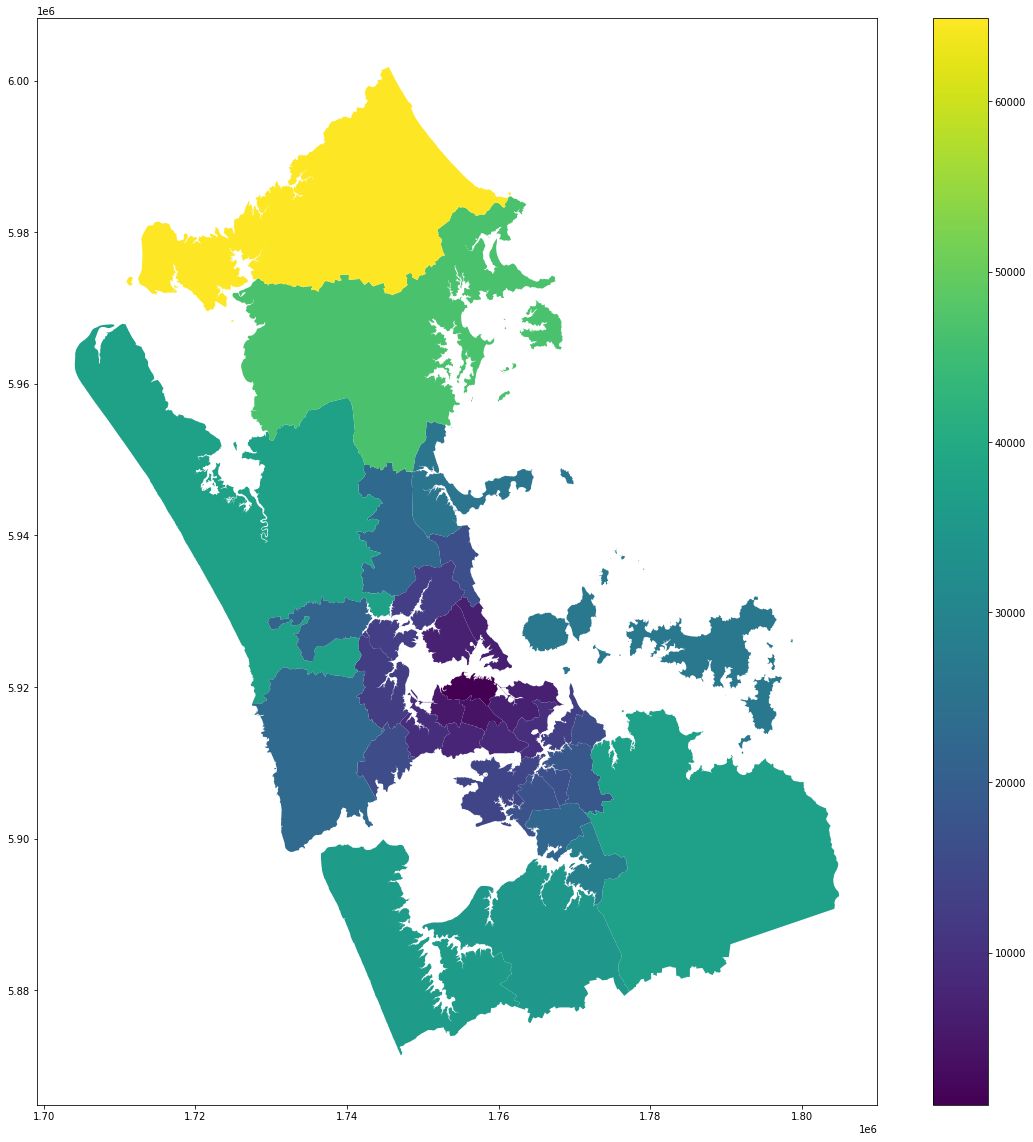

In [ ]:
df.plot(column="Hdist_skytower", legend=True)

17.	Indicator (0 or 1) for whether local area is on coastline Coast_indicator

In [ ]:
coastline = df.dissolve().boundary.iloc[0]

In [ ]:
df["Coast_indicator"] = df.intersects(coastline)
df[["Name", "Coast_indicator"]]

Name  Coast_indicator
OBJECTID                                                   
1                         Auckland Central             True
2         Beach Haven-Birkenhead-Northcote             True
3                                   Botany             True
4                       Devonport-Takapuna             True
5                          East Coast Bays             True
6                Franklin-Beachlands-Hunua             True
7                        Franklin-Pukekohe             True
8                          Franklin-Waiuku             True
9                         Henderson-Massey             True
10                          Hibiscus Coast             True
11                                  Howick             True
12                         Mangere-Otahuhu             True
13                                Manurewa             True
14                            Maungakiekie             True
15                               Mt Albert            False
16                                 Mt Eden             True
17                                  Orakei             True
18                                   Otara             True
19                               Pakuranga             True
20                                Papakura             True
21                              Papatoetoe             True
22                              Puketapapa             True
23                       Rodney-Dairy Flat             True
24                      Rodney-Helensville             True
25                  Rodney-Kumeu-Riverhead             True
26                        Rodney-Warkworth             True
27                        Rodney-Wellsford             True
28                                  Tamaki             True
29                               Titirangi             True
30          Upper Harbour Local Board Area             True
31                                 Waiheke             True
32                               Waitakere             True
33                                    Whau             True

18.	Total population from 2013 census (sum of constituent meshblocks) Census2013_population

In [ ]:
households = pd.read_csv("input/2013-mb-dataset-Total-New-Zealand-Household.csv", encoding='unicode_escape')
households

/home/nyou045/git/nodebook/nodebook/nodebookcore.py:283: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(compile(block, '<string>', mode='exec'), env)


Area_Code_and_Description                    Code  \
0                                          MB 0000100                     100   
1                                          MB 0000200                     200   
2                                          MB 0000300                     300   
3                                          MB 0000400                     400   
4                                          MB 0000501                     501   
...                                               ...                     ...   
49038  Footnotes for specific variables or categories                      23   
49039                                         Symbols                     ..C   
49040                                         Symbols                     ..    
49041                                         Symbols                       *   
49042                                          Source  Statistics New Zealand   

                                             Description  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
49038  Median total household income is rounded to th...   
49039                                       Confidential   
49040                                      not available   
49041                          not able to be calculated   
49042                                                NaN   

       2001_Census_total_households_in_occupied_private_dwellings  \
0                                                    3.0            
1                                                   27.0            
2                                                   21.0            
3                                                    9.0            
4                                                    0.0            
...                                                  ...            
49038                                                NaN            
49039                                                NaN            
49040                                                NaN            
49041                                                NaN            
49042                                                NaN            

       2006_Census_total_households_in_occupied_private_dwellings  \
0                                                    3.0            
1                                                   27.0            
2                                                   24.0            
3                                                    9.0            
4                                                    0.0            
...                                                  ...            
49038                                                NaN            
49039                                                NaN            
49040                                                NaN            
49041                                                NaN            
49042                                                NaN            

       2013_Census_total_households_in_occupied_private_dwellings  \
0                                                    3.0            
1                                                   30.0            
2                                                   21.0            
3                                                    9.0            
4                                                    0.0            
...                                                  ...            
49038                                                NaN            
49039                                                NaN            
49040                                                Na

40300


<AxesSubplot:ylabel='Frequency'>

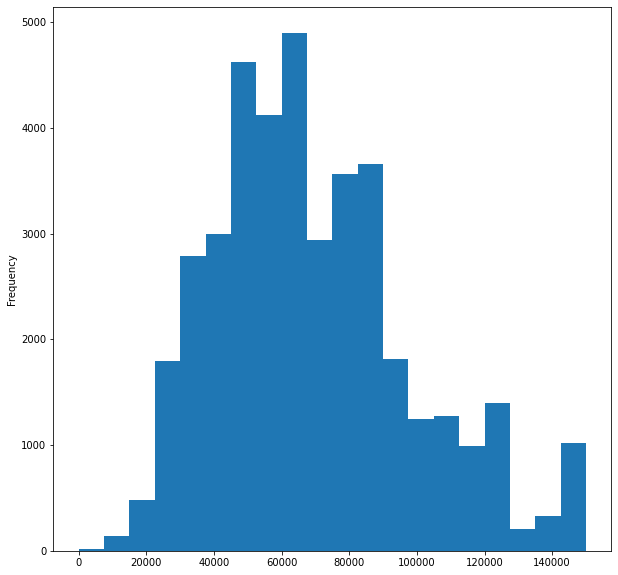

In [ ]:
key = "2013_Census_total_household_income_(grouped)(2)(3)(4)_for_households_in_occupied_private_dwellings_Median_household_income_($)(18)(23)"
households_with_income = households[households.Area_Code_and_Description.str.startswith("MB") & (households[key] != "..C") & (households[key] != "*")].copy()
print(len(households_with_income))
households_with_income[key] = households_with_income[key].astype(int)
households_with_income[key].plot(kind="hist", bins=20, figsize=(10,10))

In [ ]:
meshblocks = gpd.read_file("input/statsnzpopulation-by-meshblock-2013-census-FGDB.zip!population-by-meshblock-2013-census.gdb")
meshblocks

Meshblock MeshblockNumber  Population_Count_Usual_Resident_2013  \
0      MB 0352700         0352700                                     0   
1      MB 0728500         0728500                                     9   
2      MB 0829300         0829300                                    93   
3      MB 1280801         1280801                                     0   
4      MB 2360001         2360001                                     0   
...           ...             ...                                   ...   
46616  MB 0074002         0074002                                     0   
46617  MB 3208002         3208002                                    78   
46618  MB 3208003         3208003                                    36   
46619  MB 3209001         3209001                                    84   
46620  MB 3209002         3209002                                    75   

       Population_Count_Census_Night_2013  \
0                                       0   
1                                       6   
2                                      99   
3                                       0   
4                                       0   
...                                   ...   
46616                                   0   
46617                                  81   
46618                                  36   
46619                                  87   
46620                                  81   

                                                geometry  
0      MULTIPOLYGON (((1753237.550 5923918.395, 17532...  
1      MULTIPOLYGON (((1761011.438 5905840.848, 17610...  
2      MULTIPOLYGON (((1739739.656 5899165.556, 17397...  
3      MULTIPOLYGON (((1869852.595 5695096.558, 18714...  
4      MULTIPOLYGON (((1623601.773 5423210.098, 16235...  
...                                                  ...  
46616  MULTIPOLYGON (((1741178.600 6046572.236, 17414...  
46617  MULTIPOLYGON (((1770892.430 5911519.906, 17708...  
46618  MULTIPOLYGON (((1771025.156 5911674.629, 17709...  
46619  MULTIPOLYGON (((1771731.425 5912665.799, 17717...  
46620  MULTIPOLYGON (((1771758.103 5912422.760, 17717...  

[46621 rows x 5 columns]

In [ ]:
meshblocks.geometry = meshblocks.representative_point()

In [ ]:
meshblocks = meshblocks.merge(households, left_on="Meshblock", right_on="Area_Code_and_Description")

In [ ]:
meshblocks = gpd.sjoin(df, meshblocks, op="intersects")
meshblocks

Name                                           geometry  \
OBJECTID                                                                        
1         Auckland Central  POLYGON ((1755802.315 5921956.091, 1755861.443...   
1         Auckland Central  POLYGON ((1755802.315 5921956.091, 1755861.443...   
1         Auckland Central  POLYGON ((1755802.315 5921956.091, 1755861.443...   
1         Auckland Central  POLYGON ((1755802.315 5921956.091, 1755861.443...   
1         Auckland Central  POLYGON ((1755802.315 5921956.091, 1755861.443...   
...                    ...                                                ...   
33                    Whau  MULTIPOLYGON (((1748168.244 5916597.058, 17481...   
33                    Whau  MULTIPOLYGON (((1748168.244 5916597.058, 17481...   
33                    Whau  MULTIPOLYGON (((1748168.244 5916597.058, 17481...   
33                    Whau  MULTIPOLYGON (((1748168.244 5916597.058, 17481...   
33                    Whau  MULTIPOLYGON (((1748168.244 5916597.058, 17481...   

          Centroid_lon  Centroid_lat          Area  Residential_area  \
OBJECTID                                                               
1           174.753763    -36.855194  1.942334e+07      6.114247e+06   
1           174.753763    -36.855194  1.942334e+07      6.114247e+06   
1           174.753763    -36.855194  1.942334e+07      6.114247e+06   
1           174.753763    -36.855194  1.942334e+07      6.114247e+06   
1           174.753763    -36.855194  1.942334e+07      6.114247e+06   
...                ...           ...           ...               ...   
33          174.684472    -36.906902  2.682152e+07      1.602986e+07   
33          174.684472    -36.906902  2.682152e+07      1.602986e+07   
33          174.684472    -36.906902  2.682152e+07      1.602986e+07   
33          174.684472    -36.906902  2.682152e+07      1.602986e+07   
33          174.684472    -36.906902  2.682152e+07      1.602986e+07   

               SH_area      MHS_area      MHU_area      THA_area  ...  \
OBJECTID                                                          ...   
1         3.264382e+06  1.005111e+06  9.761411e+05  8.686144e+05  ...   
1         3.264382e+06  1.005111e+06  9.761411e+05  8.686144e+05  ...   
1         3.264382e+06  1.005111e+06  9.761411e+05  8.686144e+05  ...   
1         3.264382e+06  1.005111e+06  9.761411e+05  8.686144e+05  ...   
1         3.264382e+06  1.005111e+06  9.761411e+05  8.686144e+05  ...   
...                ...           ...           ...           ...  ...   
33        9.520285e+05  6.562767e+06  6.248986e+06  2.009848e+06  ...   
33        9.520285e+05  6.562767e+06  6.248986e+06  2.009848e+06  ...   
33        9.520285e+05  6.562767e+06  6.248986e+06  2.009848e+06  ...   
33        9.520285e+05  6.562767e+06  6.248986e+06  2.009848e+06  ...   
33        9.520285e+05  6.562767e+06  6.248986e+06  2.009848e+06  ...   

          2006_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Not_Elsewhere_Included(22)  \
OBJECTID                                                                                                                             
1                                                       ..C                                                                          
1                                                       ..C                                                                          
1                                                       ..C                                                                          
1                                                       ..C                                                                          
1                                                       ..C                                                                          
...                                                     ...                                                                          
33       

In [ ]:
group = meshblocks.groupby("OBJECTID")

In [ ]:
df["Census2013_population"] = group["Population_Count_Usual_Resident_2013"].sum()

19.	Number of dwellings from 2013 census (sum of constituent meshblocks) Census2013_dwellings

In [ ]:
df["Census2013_dwellings"] = group["2013_Census_total_households_in_occupied_private_dwellings"].sum()

20.	Average Household Income (weighted average of constituent meshblock household incomes from 2013 census, where the weights are given by the number of households in each of the constituent meshblocks in the local area) Census2013_avg_HH_income

In [ ]:
meshblocks_with_income = meshblocks[(meshblocks[key] != "..C") & (meshblocks[key] != "*")].copy()
meshblocks_with_income[key] = meshblocks_with_income[key].astype(int)
meshblocks_with_income

Name                                           geometry  \
OBJECTID                                                                        
1         Auckland Central  POLYGON ((1755802.315 5921956.091, 1755861.443...   
1         Auckland Central  POLYGON ((1755802.315 5921956.091, 1755861.443...   
1         Auckland Central  POLYGON ((1755802.315 5921956.091, 1755861.443...   
1         Auckland Central  POLYGON ((1755802.315 5921956.091, 1755861.443...   
1         Auckland Central  POLYGON ((1755802.315 5921956.091, 1755861.443...   
...                    ...                                                ...   
33                    Whau  MULTIPOLYGON (((1748168.244 5916597.058, 17481...   
33                    Whau  MULTIPOLYGON (((1748168.244 5916597.058, 17481...   
33                    Whau  MULTIPOLYGON (((1748168.244 5916597.058, 17481...   
33                    Whau  MULTIPOLYGON (((1748168.244 5916597.058, 17481...   
33                    Whau  MULTIPOLYGON (((1748168.244 5916597.058, 17481...   

          Centroid_lon  Centroid_lat          Area  Residential_area  \
OBJECTID                                                               
1           174.753763    -36.855194  1.942334e+07      6.114247e+06   
1           174.753763    -36.855194  1.942334e+07      6.114247e+06   
1           174.753763    -36.855194  1.942334e+07      6.114247e+06   
1           174.753763    -36.855194  1.942334e+07      6.114247e+06   
1           174.753763    -36.855194  1.942334e+07      6.114247e+06   
...                ...           ...           ...               ...   
33          174.684472    -36.906902  2.682152e+07      1.602986e+07   
33          174.684472    -36.906902  2.682152e+07      1.602986e+07   
33          174.684472    -36.906902  2.682152e+07      1.602986e+07   
33          174.684472    -36.906902  2.682152e+07      1.602986e+07   
33          174.684472    -36.906902  2.682152e+07      1.602986e+07   

               SH_area      MHS_area      MHU_area      THA_area  ...  \
OBJECTID                                                          ...   
1         3.264382e+06  1.005111e+06  9.761411e+05  8.686144e+05  ...   
1         3.264382e+06  1.005111e+06  9.761411e+05  8.686144e+05  ...   
1         3.264382e+06  1.005111e+06  9.761411e+05  8.686144e+05  ...   
1         3.264382e+06  1.005111e+06  9.761411e+05  8.686144e+05  ...   
1         3.264382e+06  1.005111e+06  9.761411e+05  8.686144e+05  ...   
...                ...           ...           ...           ...  ...   
33        9.520285e+05  6.562767e+06  6.248986e+06  2.009848e+06  ...   
33        9.520285e+05  6.562767e+06  6.248986e+06  2.009848e+06  ...   
33        9.520285e+05  6.562767e+06  6.248986e+06  2.009848e+06  ...   
33        9.520285e+05  6.562767e+06  6.248986e+06  2.009848e+06  ...   
33        9.520285e+05  6.562767e+06  6.248986e+06  2.009848e+06  ...   

          2006_Census_access_to_telecommunications(20)(21)_for_households_in_occupied_private_dwellings_Not_Elsewhere_Included(22)  \
OBJECTID                                                                                                                             
1                                                       ..C                                                                          
1                                                       ..C                                                                          
1                                                         3                                                                          
1                                                         0                                                                          
1                                                         0                                                                          
...                                                     ...                                                                          
33       

In [ ]:
meshblocks_with_income["income*dwellings"] = meshblocks_with_income[key] * meshblocks_with_income["2013_Census_total_households_in_occupied_private_dwellings"]
meshblocks_with_income["income*dwellings"]

OBJECTID
1     1240800.0
1     1350000.0
1     4717500.0
1     4440000.0
1     2550000.0
        ...    
33    2565000.0
33    3622500.0
33    3900000.0
33    1836000.0
33     930600.0
Name: income*dwellings, Length: 10830, dtype: float64

In [ ]:
group = meshblocks_with_income.groupby("OBJECTID")
df["Census2013_avg_HH_income"] = group["income*dwellings"].sum() / group["2013_Census_total_households_in_occupied_private_dwellings"].sum()

In [ ]:
df[["Name", "Census2013_population", "Census2013_dwellings", "Census2013_avg_HH_income"]].sort_values(by="Census2013_population", ascending=False)

Name  Census2013_population  \
OBJECTID                                                            
9                         Henderson-Massey                 107658   
2         Beach Haven-Birkenhead-Northcote                  82431   
13                                Manurewa                  82230   
17                                  Orakei                  79581   
1                         Auckland Central                  77058   
33                                    Whau                  72585   
12                         Mangere-Otahuhu                  70998   
4                       Devonport-Takapuna                  55398   
30          Upper Harbour Local Board Area                  53571   
22                              Puketapapa                  52959   
15                               Mt Albert                  47913   
3                                   Botany                  46878   
16                                 Mt Eden                  46752   
20                                Papakura                  45687   
21                              Papatoetoe                  45633   
10                          Hibiscus Coast                  45141   
5                          East Coast Bays                  44634   
28                                  Tamaki                  42189   
11                                  Howick                  40299   
19                               Pakuranga                  39924   
29                               Titirangi                  35958   
7                        Franklin-Pukekohe                  31176   
18                                   Otara                  30033   
14                            Maungakiekie                  27780   
6                Franklin-Beachlands-Hunua                  21111   
24                      Rodney-Helensville                  17832   
26                        Rodney-Warkworth                  17637   
8                          Franklin-Waiuku                  13581   
32                               Waitakere                  12477   
31                                 Waiheke                   8310   
25                  Rodney-Kumeu-Riverhead                   7257   
23                       Rodney-Dairy Flat                   6564   
27                        Rodney-Wellsford                   5595   

          Census2013_dwellings  Census2013_avg_HH_income  
OBJECTID                                                  
9                      34461.0              68347.842761  
2                      28344.0              80154.552207  
13                     22584.0              69202.861326  
17                     29001.0             110143.425140  
1                      31506.0              86499.398108  
33                     23928.0              65948.529781  
12                     17427.0              61855.553636  
4                      20307.0              89560.517751  
30                     17079.0              92354.882984  
22                     16695.0              75460.348858  
15                     15630.0              97670.686671  
3                      13893.0              93325.464764  
16                     16155.0              83313.629602  
20                     14919.0              68043.070707  
21                     13272.0              65055.631090  
10                     17397.0              70786.765722  
5                      15354.0              96602.171362  
28                     13551.0              64390.277469  
11                     13836.0              85281.267636  
19                     13206.0              82096.046353  
29                     12192.0              80713.729357  
7                      10863.0              78094.119279  
18                      6693.0              58229.733394  
14                     10368.0              76915.212333  
6                       7332.0              97416.701031  
24                      6381.

In [ ]:
df

Name  \
OBJECTID                                     
1                         Auckland Central   
2         Beach Haven-Birkenhead-Northcote   
3                                   Botany   
4                       Devonport-Takapuna   
5                          East Coast Bays   
6                Franklin-Beachlands-Hunua   
7                        Franklin-Pukekohe   
8                          Franklin-Waiuku   
9                         Henderson-Massey   
10                          Hibiscus Coast   
11                                  Howick   
12                         Mangere-Otahuhu   
13                                Manurewa   
14                            Maungakiekie   
15                               Mt Albert   
16                                 Mt Eden   
17                                  Orakei   
18                                   Otara   
19                               Pakuranga   
20                                Papakura   
21                              Papatoetoe   
22                              Puketapapa   
23                       Rodney-Dairy Flat   
24                      Rodney-Helensville   
25                  Rodney-Kumeu-Riverhead   
26                        Rodney-Warkworth   
27                        Rodney-Wellsford   
28                                  Tamaki   
29                               Titirangi   
30          Upper Harbour Local Board Area   
31                                 Waiheke   
32                               Waitakere   
33                                    Whau   

                                                   geometry  Centroid_lon  \
OBJECTID                                                                    
1         POLYGON ((1755802.315 5921956.091, 1755861.443...    174.753763   
2         POLYGON ((1757287.966 5925962.738, 1757211.333...    174.721897   
3         POLYGON ((1770748.846 5912611.168, 1770889.893...    174.917904   
4         POLYGON ((1755276.581 5932026.336, 1755278.305...    174.769923   
5         POLYGON ((1756125.006 5940268.048, 1756139.852...    174.733122   
6         MULTIPOLYGON (((1804302.354 5890738.079, 17905...    175.101754   
7         POLYGON ((1765085.620 5897344.807, 1765096.229...    174.864884   
8         POLYGON ((1744829.308 5899882.633, 1744835.760...    174.666624   
9         POLYGON ((1745963.138 5923457.510, 1745945.884...    174.621864   
10        MULTIPOLYGON (((1752023.352 5954803.281, 17520...    174.720160   
11        POLYGON ((1771447.460 5916900.636, 1771474.703...    174.926939   
12        MULTIPOLYGON (((1766142.746 5910838.845, 17661...    174.794437   
13        POLYGON ((1769432.488 5904664.673, 1769471.312...    174.886011   
14        POLYGON ((1759418.674 5915517.660, 1759596.351...    174.799976   
15        POLYGON ((1756291.061 5918265.104, 1756266.530...    174.765299   
16        POLYGON ((1751910.995 5920299.659, 1751917.632...    174.718360   
17        POLYGON ((1759833.395 5920429.502, 1759837.143...    174.830542   
18        MULTIPOLYGON (((1765765.640 5909501.655, 17657...    174.883562   
19        POLYGON ((1769523.742 5920466.582, 1769527.337...    174.891901   
20        POLYGON ((1772188.699 5902202.011, 1772192.566...    174.940390   
21        POLYGON ((1765105.421 5908611.893, 1765113.661...    174.849291   
22        POLYGON ((1753132.892 5915040.177, 1753141.101...    174.741502   
23        POLYGON ((1746055.938 5948651.765, 1746067.112...    174.636168   
24        MULTIPOLYGON (((1710567.626 5967865.416, 17106...    174.425342   
25        POLYGON ((1742532.808 5931237.574, 1742490.377...    174.538408   
26        MULTIPOLYGON (((1761692.564 5984690.018, 17617...    174.613063   
27        MULTIPOLYGON (((1746318.204 6000215.757, 17464...    174.538530   
28        POLYGON ((1765594.677 5917986.938, 1765609.808...    174.848247   
29        POLYGON ((1749038.038 5910572.842, 1749034.230...    174.629790   
30        MULTIPOLYGON (((1743880.554 59

In [ ]:
df.drop(columns="geometry").to_csv("output/Local_Area.csv")

## Meshblock 2018 dataset:
1.	Meshblock numeric code Code
2.	Centroid longitude Centroid_lon
3.	Centroid latitude Centroid_lat

In [ ]:
mb = gpd.read_file("input/statsnzmeshblock-higher-geographies-2018-generalised-FGDB.zip!meshblock-higher-geographies-2018-generalised.gdb")

In [ ]:
mb = mb[(mb.TA2018_V1_00_NAME == "Auckland") & mb.LANDWATER_NAME.isin(["Mainland", "Island"])]

In [ ]:
mb = mb.rename(columns={"MB2018_V1_00": "Code"})
mb["Centroid_lon"] = mb.centroid.to_crs(epsg=4326).x
mb["Centroid_lat"] = mb.centroid.to_crs(epsg=4326).y
mb

Code SA12018_V1_00 SA22018_V1_00 SA22018_V1_00_NAME UR2018_V1_00  \
543    0137200       7001157        110400        Cape Rodney         1098   
544    0170700       7001317        114300       Gulf Islands         1098   
545    0438700       7001130        111800    Barrier Islands         1098   
546    0439306       7001135        111800    Barrier Islands         1109   
547    0439307       7001135        111800    Barrier Islands         1109   
...        ...           ...           ...                ...          ...   
53299  4011884       7001155        110400        Cape Rodney         1073   
53301  4011883       7001154        110400        Cape Rodney         1098   
53333  4011925       7009199        156900         Baverstock         1108   
53359  4011971       7009313        158600      Ormiston East         1108   
53360  4011972       7009335        158900    Tuscany Heights         1108   

          UR2018_V1_00_NAME IUR2018_V1_00 IUR2018_V1_00_NAME CB2018_V1_00  \
543    Other rural Auckland            22        Rural other        07601   
544    Other rural Auckland            22        Rural other        07602   
545    Other rural Auckland            22        Rural other        07608   
546                Tryphena            21   Rural settlement        07608   
547                Tryphena            21   Rural settlement        07608   
...                     ...           ...                ...          ...   
53299            Whangateau            21   Rural settlement        07601   
53301  Other rural Auckland            22        Rural other        07601   
53333              Auckland            11   Major urban area        07616   
53359              Auckland            11   Major urban area        07616   
53360              Auckland            11   Major urban area        07616   

                        CB2018_V1_00_NAME  ... WARD2018_V1_00  \
543               Rodney Local Board Area  ...          07601   
544    Hibiscus and Bays Local Board Area  ...          07602   
545        Great Barrier Local Board Area  ...          07605   
546        Great Barrier Local Board Area  ...          07605   
547        Great Barrier Local Board Area  ...          07605   
...                                   ...  ...            ...   
53299             Rodney Local Board Area  ...          07601   
53301             Rodney Local Board Area  ...          07601   
53333             Howick Local Board Area  ...          07610   
53359             Howick Local Board Area  ...          07610   
53360             Howick Local Board Area  ...          07610   

           WARD2018_V1_00_NAME LANDWATER LANDWATER_NAME LAND_AREA_SQ_KM  \
543                Rodney Ward        11         Island        0.097567   
544                Albany Ward        11         Island        0.005545   
545    Waitemata and Gulf Ward        11         Island       70.725594   
546    Waitemata and Gulf Ward        11         Island        0.078233   
547    Waitemata and Gulf Ward        11         Island        0.475337   
...                        ...       ...            ...             ...   
53299              Rodney Ward        12       Mainland        1.161280   
53301              Rodney Ward        12       Mainland        7.680889   
53333              Howick Ward        12       Mainland        0.242189   
53359              Howick Ward        12       Mainland        0.487587   
53360              Howick Ward        12       Mainland        0.178460   

      AREA_SQ_KM   Shape_Length  \
543     0.097567    1356.404986   
544     0.005545     321.185380   
545    70.725594  100201.649851   
546     0.078233    1494.370224   
547     0.475337    3408.621475   
...          ...            ...   
53299   1.161280    7266.530123   
53301   7.680889   17076.458542   
53333   0.242189    2352.598074   
53359   0.487587    3692.342983   
53360   0.178460    1798.203501   

                                             

In [ ]:
mb = mb.set_index("Code")

4.	Haversine distance from centroid to Skytower Hdist_skytower

In [ ]:
skytower = Point(1757109.809, 5920500.841)
mb["Hdist_skytower"] = mb.centroid.distance(skytower) # meters
mb

SA12018_V1_00 SA22018_V1_00 SA22018_V1_00_NAME UR2018_V1_00  \
Code                                                                  
0137200       7001157        110400        Cape Rodney         1098   
0170700       7001317        114300       Gulf Islands         1098   
0438700       7001130        111800    Barrier Islands         1098   
0439306       7001135        111800    Barrier Islands         1109   
0439307       7001135        111800    Barrier Islands         1109   
...               ...           ...                ...          ...   
4011884       7001155        110400        Cape Rodney         1073   
4011883       7001154        110400        Cape Rodney         1098   
4011925       7009199        156900         Baverstock         1108   
4011971       7009313        158600      Ormiston East         1108   
4011972       7009335        158900    Tuscany Heights         1108   

            UR2018_V1_00_NAME IUR2018_V1_00 IUR2018_V1_00_NAME CB2018_V1_00  \
Code                                                                          
0137200  Other rural Auckland            22        Rural other        07601   
0170700  Other rural Auckland            22        Rural other        07602   
0438700  Other rural Auckland            22        Rural other        07608   
0439306              Tryphena            21   Rural settlement        07608   
0439307              Tryphena            21   Rural settlement        07608   
...                       ...           ...                ...          ...   
4011884            Whangateau            21   Rural settlement        07601   
4011883  Other rural Auckland            22        Rural other        07601   
4011925              Auckland            11   Major urban area        07616   
4011971              Auckland            11   Major urban area        07616   
4011972              Auckland            11   Major urban area        07616   

                          CB2018_V1_00_NAME CON2018_V1_00  ...  \
Code                                                       ...   
0137200             Rodney Local Board Area          0299  ...   
0170700  Hibiscus and Bays Local Board Area          0299  ...   
0438700      Great Barrier Local Board Area          0299  ...   
0439306      Great Barrier Local Board Area          0299  ...   
0439307      Great Barrier Local Board Area          0299  ...   
...                                     ...           ...  ...   
4011884             Rodney Local Board Area          0299  ...   
4011883             Rodney Local Board Area          0299  ...   
4011925             Howick Local Board Area          0299  ...   
4011971             Howick Local Board Area          0299  ...   
4011972             Howick Local Board Area          0299  ...   

             WARD2018_V1_00_NAME LANDWATER LANDWATER_NAME LAND_AREA_SQ_KM  \
Code                                                                        
0137200              Rodney Ward        11         Island        0.097567   
0170700              Albany Ward        11         Island        0.005545   
0438700  Waitemata and Gulf Ward        11         Island       70.725594   
0439306  Waitemata and Gulf Ward        11         Island        0.078233   
0439307  Waitemata and Gulf Ward        11         Island        0.475337   
...                          ...       ...            ...             ...   
4011884              Rodney Ward        12       Mainland        1.161280   
4011883              Rodney Ward        12       Mainland        7.680889   
4011925              Howick Ward        12       Mainland        0.242189   
4011971              Howick Ward        12       Mainland        0.487587   
4011972              Howick Ward        12       Mainland        0.178460   

        AREA_SQ_KM   Shape_Length  \
Code                                
0137200   0.097567    1356.404986   
0170700   0.005545     321.185380   
0438700  70.725594  100201.649851   
0439306   

Text(0.5, 1.0, 'Meshblocks <5KM from the Skytower')

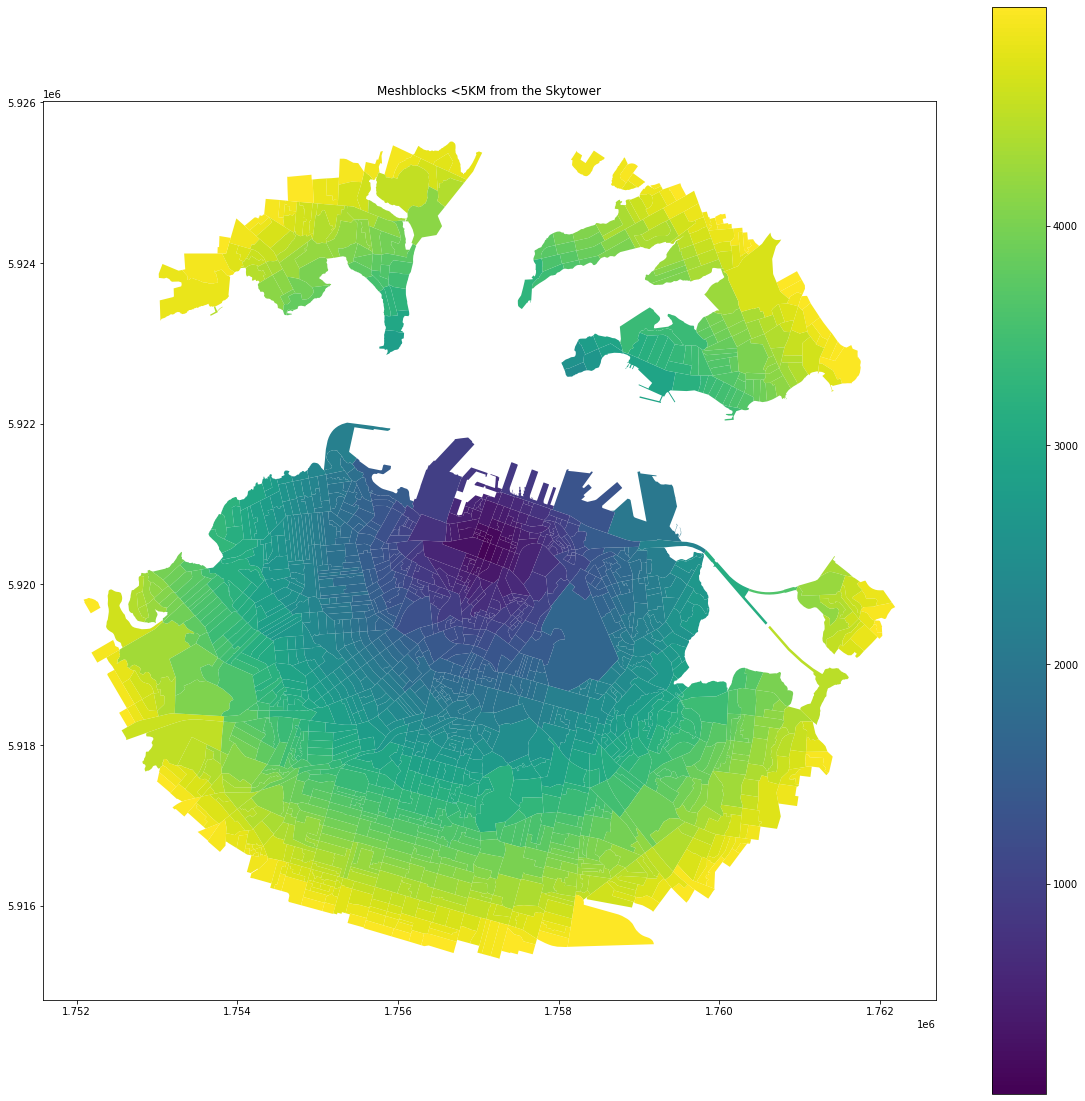

In [ ]:
mb[mb.Hdist_skytower < 5000].plot(column="Hdist_skytower", legend=True)
plt.title("Meshblocks <5KM from the Skytower")

5.	Minimum Haversine distance from centroid to coast Hdist_coast

In [ ]:
coastline = gpd.read_file("input/lds-nz-coastlines-and-islands-polygons-topo-150k-FGDB.zip!nz-coastlines-and-islands-polygons-topo-150k.gdb")

<AxesSubplot:>

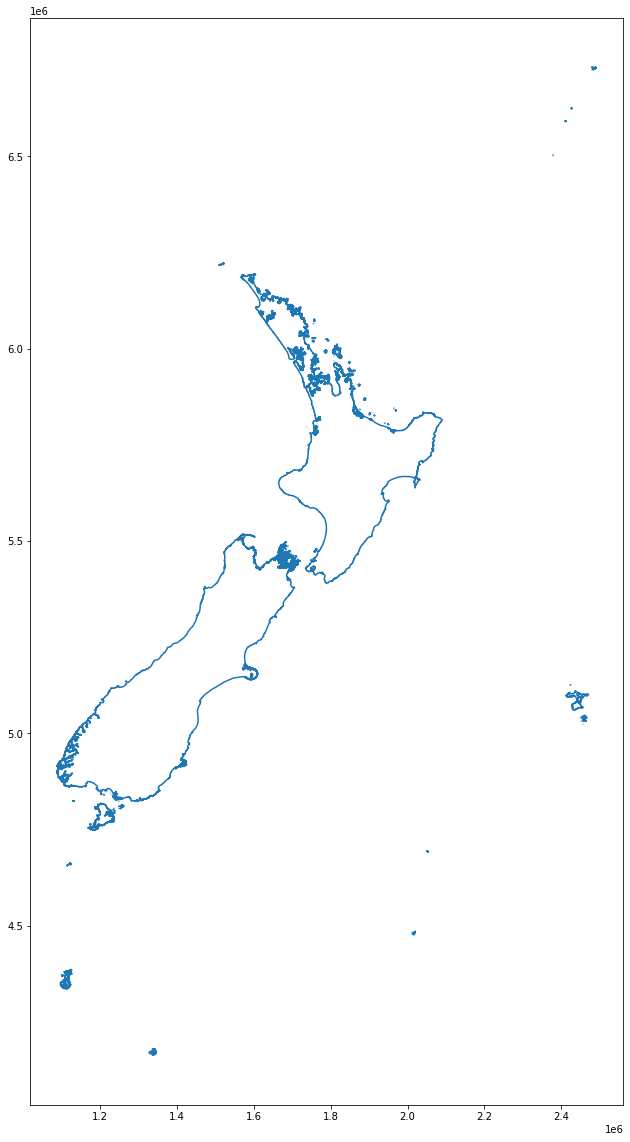

In [ ]:
coastline.boundary.plot()

In [ ]:
coastline = coastline.dissolve().boundary.iloc[0]

In [ ]:
%%time
mb["Hdist_coast"] = [point.distance(coastline) for point in tqdm(mb.centroid)]

  0%|          | 0/13441 [00:00<?, ?it/s]

CPU times: user 3min 6s, sys: 437 ms, total: 3min 7s
Wall time: 3min 6s


In [ ]:
mb["Hdist_coast"].describe() # meters

count    13441.000000
mean      1596.010824
std       1792.477098
min          0.488582
25%        444.163564
50%       1076.033671
75%       2116.959738
max      16027.664069
Name: Hdist_coast, dtype: float64

<AxesSubplot:>

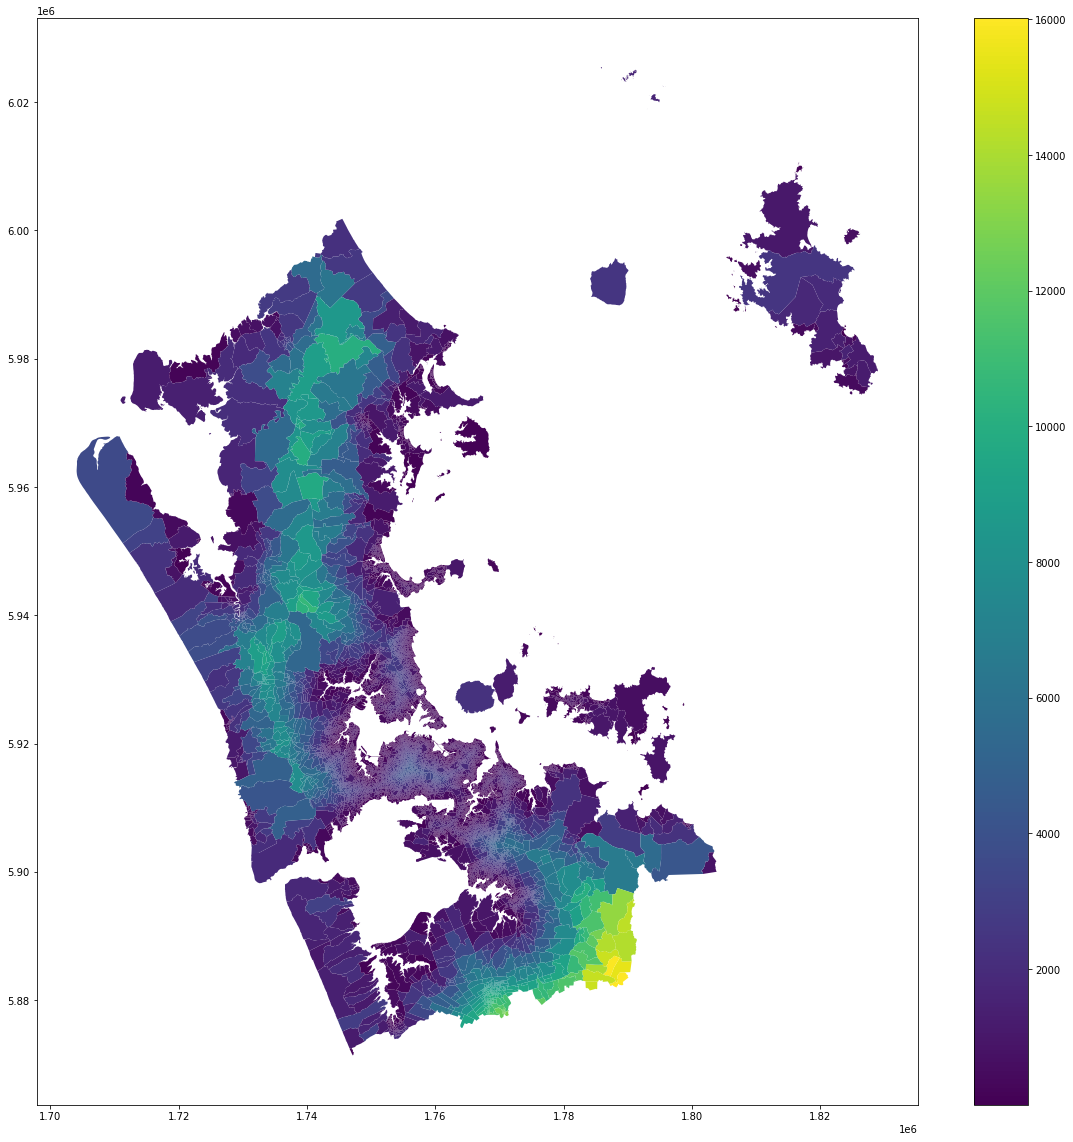

In [ ]:
mb.plot(column="Hdist_coast", legend=True)

6.	Manhattan distance from centroid to Skytower Mdist_skytower

OSRM API docs - http://project-osrm.org/docs/v5.24.0/api/#table-service

In [ ]:
len(mb)

13441

In [ ]:
BASE_URL = "http://osrm.auckland-cer.cloud.edu.au"
def drive(points, to):
    points = [f"{point.x},{point.y}" for point in points]
    points = ";".join(points)
    result = requests.get(f"{BASE_URL}/table/v1/driving/{to};{points}?destinations=0&annotations=duration,distance")
    return result.json()

In [ ]:
skytower = "174.76218883819053,-36.848429166610735"

In [ ]:
%%time
result = drive(points=mb.centroid.to_crs(epsg=4326), to=skytower)

CPU times: user 1.26 s, sys: 30 ms, total: 1.29 s
Wall time: 1min 11s


In [ ]:
result.keys()

dict_keys(['code', 'sources', 'destinations', 'durations', 'distances'])

In [ ]:
mb["Mdist_skytower"] = [r[0] for r in result["distances"][1:]]
mb["Mdist_skytower"].describe() # Units are meters

count     13441.000000
mean      21083.293989
std       15682.240482
min          59.500000
25%       11506.700000
50%       17201.300000
75%       24218.100000
max      136633.200000
Name: Mdist_skytower, dtype: float64

<AxesSubplot:>

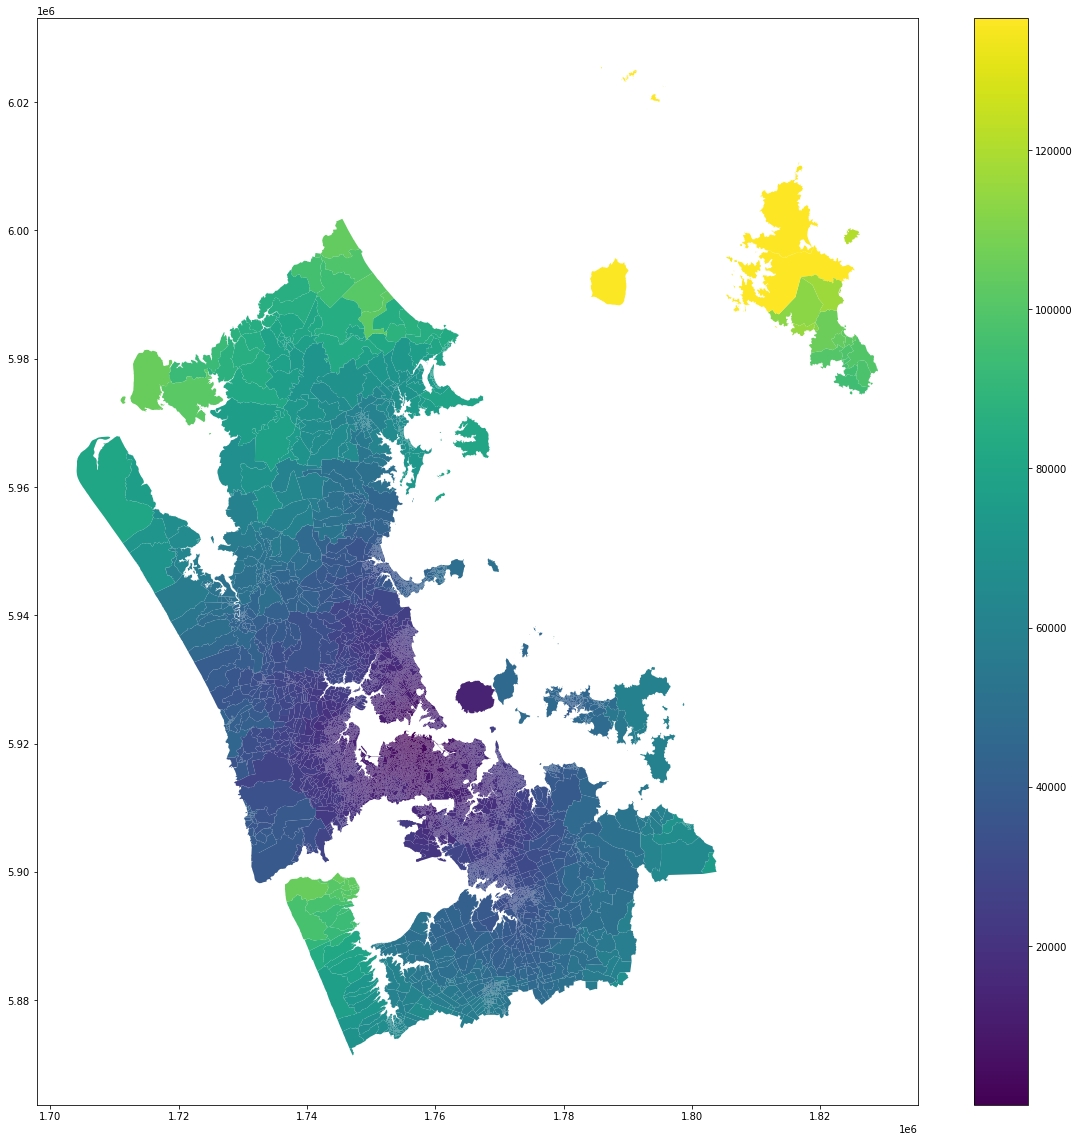

In [ ]:
mb.plot(column="Mdist_skytower", legend=True)

Text(0.5, 1.0, 'Meshblocks <5KM driving from the Skytower')

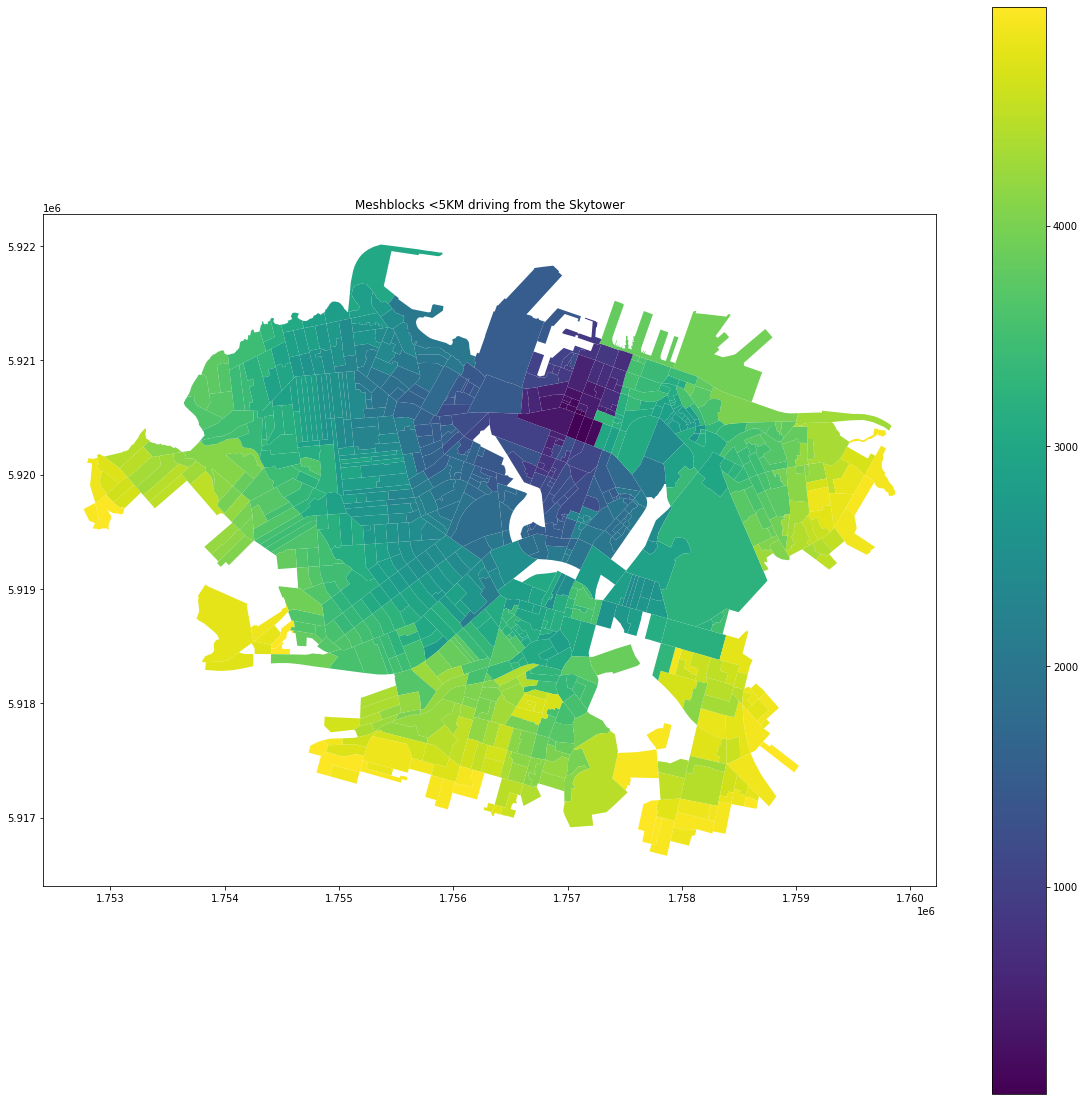

In [ ]:
mb[mb.Mdist_skytower < 5000].plot(column="Mdist_skytower", legend=True)
plt.title("Meshblocks <5KM driving from the Skytower")

In [ ]:
# Some strange gaps there - let's investigate
points = mb[(mb.Hdist_skytower < 1000) & (mb.Mdist_skytower > 5000)]
points = [f"{point.x},{point.y}" for point in points.centroid.to_crs(epsg=4326)]
points

['174.75624867471396,-36.85383185528419',
 '174.75345762242358,-36.850503483712096',
 '174.75551843174853,-36.8526249602678',
 '174.75734772557055,-36.855642008978414']

In [ ]:
routes = []
for point in points:
    route_result = requests.get(f"{BASE_URL}/route/v1/driving/{skytower};{point}?geometries=geojson")
    routes.extend(route_result.json()["routes"])
routes

[{'geometry': {'coordinates': [[174.762021, -36.848507],
    [174.762081, -36.848111],
    [174.761663, -36.847994],
    [174.760279, -36.851092],
    [174.756401, -36.856918],
    [174.756298, -36.858244],
    [174.757545, -36.859416],
    [174.761092, -36.859842],
    [174.763064, -36.860822],
    [174.764566, -36.862759],
    [174.766927, -36.864565],
    [174.768415, -36.867436],
    [174.774277, -36.87211],
    [174.774115, -36.872578],
    [174.773385, -36.872143],
    [174.771509, -36.870028],
    [174.768209, -36.867454],
    [174.766746, -36.864588],
    [174.764693, -36.863068],
    [174.76298, -36.861326],
    [174.761243, -36.860494],
    [174.758161, -36.860144],
    [174.756868, -36.859449],
    [174.755729, -36.85724],
    [174.756435, -36.854967],
    [174.756232, -36.853838]],
   'type': 'LineString'},
  'legs': [{'steps': [],
    'distance': 6623.4,
    'duration': 471.2,
    'summary': '',
    'weight': 482.5}],
  'distance': 6623.4,
  'duration': 471.2,
  'weight_na

In [ ]:
route_df = pd.read_json(json.dumps(routes))
route_df["geometry"] = route_df['geometry'].apply(shape)
route_df = gpd.GeoDataFrame(route_df)
route_df

geometry  \
0  LINESTRING (174.76202 -36.84851, 174.76208 -36...   
1  LINESTRING (174.76202 -36.84851, 174.76197 -36...   
2  LINESTRING (174.76202 -36.84851, 174.76208 -36...   
3  LINESTRING (174.76202 -36.84851, 174.76197 -36...   

                                                legs  distance  duration  \
0  [{'steps': [], 'distance': 6623.4, 'duration':...    6623.4     471.2   
1  [{'steps': [], 'distance': 1487.9, 'duration':...    1487.9     201.1   
2  [{'steps': [], 'distance': 11247.2, 'duration'...   11247.2     783.1   
3  [{'steps': [], 'distance': 1022.2, 'duration':...    1022.2     135.0   

   weight_name  weight  
0  routability   482.5  
1  routability   212.4  
2  routability   794.4  
3  routability   146.3

<AxesSubplot:>

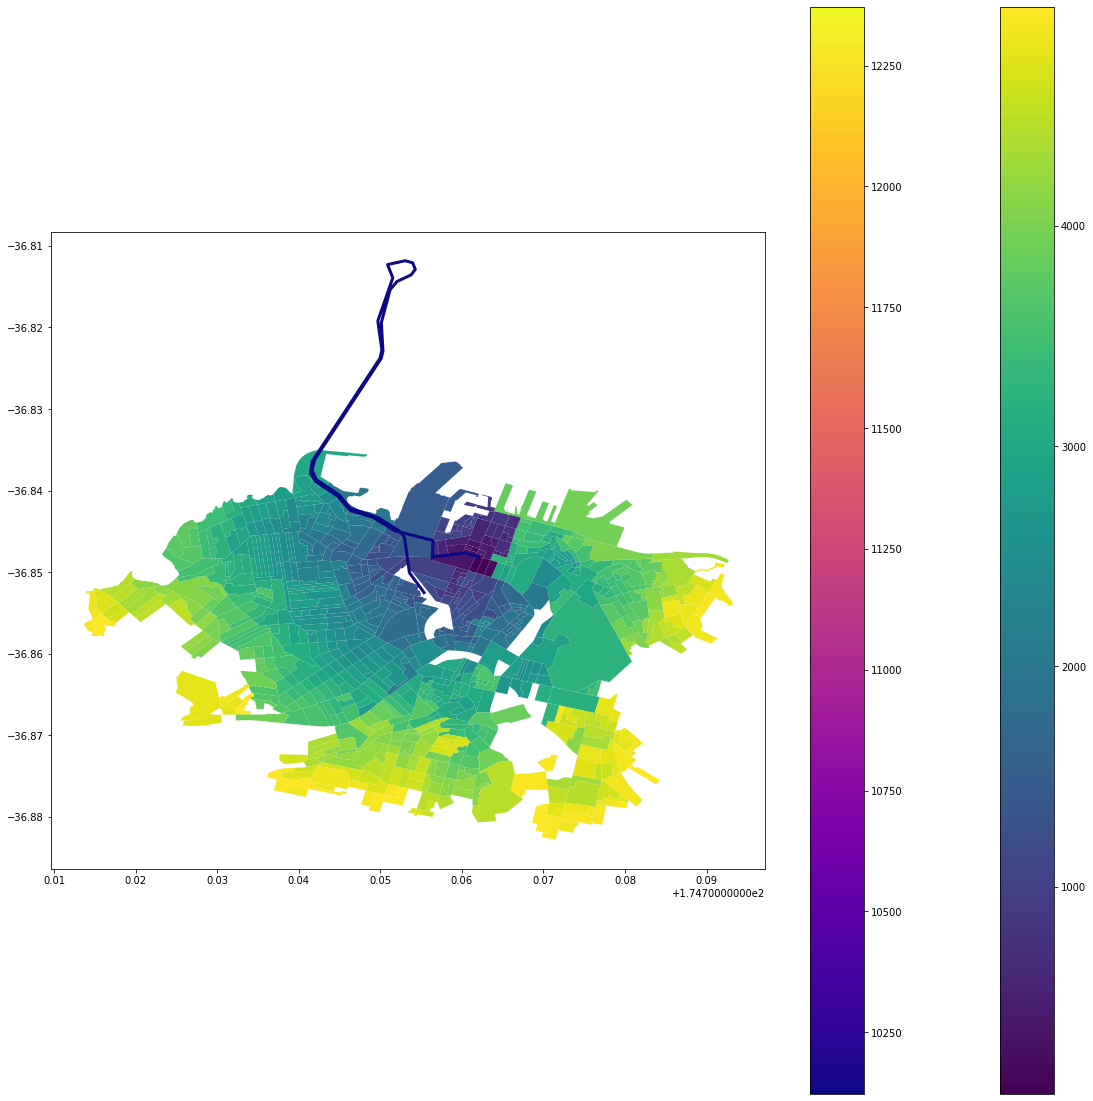

In [ ]:
from shapely.geometry import shape
ax = mb[mb.Mdist_skytower < 5000].to_crs(epsg=4326).plot(column="Mdist_skytower", legend=True)
route_df[route_df["distance"]>10000].plot(column="distance", legend=True, ax=ax, linewidth=3, cmap="plasma")

In [ ]:
points = mb[(mb.Hdist_skytower < 1000) & (mb.Mdist_skytower > 5000)]
points = [f"{point.y},{point.x}" for point in points.centroid.to_crs(epsg=4326)]
for point in points:
    print(f"https://map.project-osrm.org/?loc={point}&loc=-36.848429166610735,174.76218883819053&srv=0")

https://map.project-osrm.org/?loc=-36.85383185528419,174.75624867471396&loc=-36.848429166610735,174.76218883819053&srv=0
https://map.project-osrm.org/?loc=-36.850503483712096,174.75345762242358&loc=-36.848429166610735,174.76218883819053&srv=0
https://map.project-osrm.org/?loc=-36.8526249602678,174.75551843174853&loc=-36.848429166610735,174.76218883819053&srv=0
https://map.project-osrm.org/?loc=-36.855642008978414,174.75734772557055&loc=-36.848429166610735,174.76218883819053&srv=0


In [ ]:
%%time
north = drive(points=mb.centroid.translate(yoff=-100).to_crs(epsg=4326), to=skytower)
west = drive(points=mb.centroid.translate(xoff=-100).to_crs(epsg=4326), to=skytower)
east = drive(points=mb.centroid.translate(xoff=100).to_crs(epsg=4326), to=skytower)
south = drive(points=mb.centroid.translate(yoff=100).to_crs(epsg=4326), to=skytower)

CPU times: user 6.78 s, sys: 20 ms, total: 6.8 s
Wall time: 5min 4s


In [ ]:
mb["Mdist_skytower_center"] = [r[0] for r in result["distances"][1:]]
mb["Mdist_skytower_north"] = [r[0] for r in north["distances"][1:]]
mb["Mdist_skytower_west"] = [r[0] for r in west["distances"][1:]]
mb["Mdist_skytower_east"] = [r[0] for r in east["distances"][1:]]
mb["Mdist_skytower_south"] = [r[0] for r in south["distances"][1:]]
mb[["Mdist_skytower_center",
    "Mdist_skytower_north",
    "Mdist_skytower_west",
    "Mdist_skytower_east",
    "Mdist_skytower_south"]].describe()

Mdist_skytower_center  Mdist_skytower_north  Mdist_skytower_west  \
count           13441.000000          13441.000000         13441.000000   
mean            21083.293989          21104.614404         21076.932974   
std             15682.240482          15672.937314         15680.363394   
min                59.500000             29.900000           110.700000   
25%             11506.700000          11517.900000         11485.800000   
50%             17201.300000          17168.500000         17202.300000   
75%             24218.100000          24276.600000         24203.500000   
max            136633.200000         136633.200000        136633.200000   

       Mdist_skytower_east  Mdist_skytower_south  
count         13441.000000          13441.000000  
mean          21080.920289          21044.649126  
std           15684.086849          15692.827461  
min             155.200000            109.600000  
25%           11514.800000          11467.600000  
50%           17154.200000          17146.600000  
75%           24235.700000          24178.300000  
max          136633.200000         136633.200000

In [ ]:
mb["Mdist_skytower"] = mb[[
    "Mdist_skytower_center",
    "Mdist_skytower_north",
    "Mdist_skytower_west",
    "Mdist_skytower_east",
    "Mdist_skytower_south"
]].min(axis=1)
(mb["Mdist_skytower_center"] - mb["Mdist_skytower"]).describe()

count    13441.000000
mean       270.629648
std        506.630148
min          0.000000
25%         81.500000
50%        131.900000
75%        261.300000
max      12976.900000
dtype: float64

Text(0.5, 1.0, 'Meshblocks <5KM driving from the Skytower')

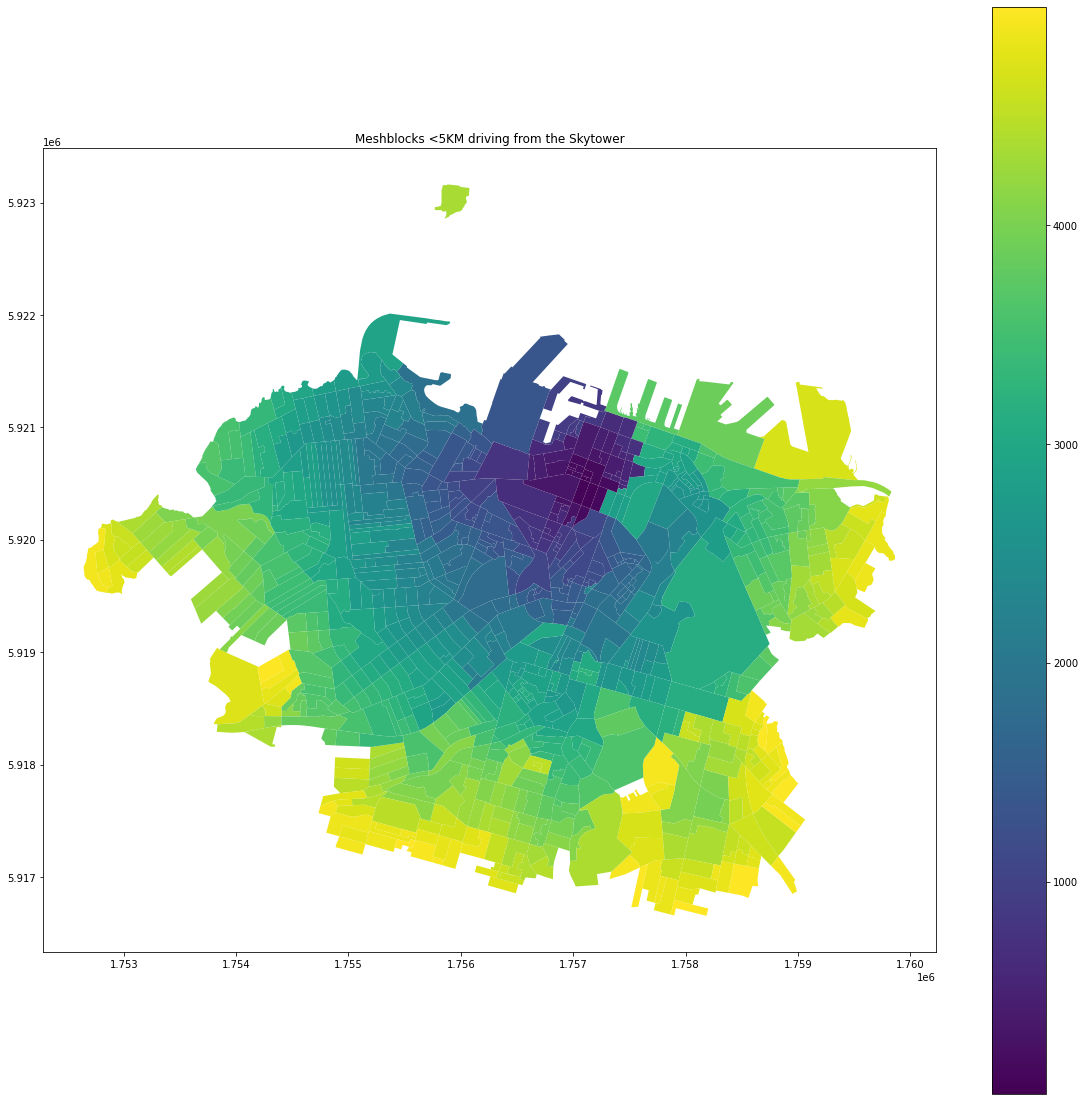

In [ ]:
mb[mb.Mdist_skytower < 5000].plot(column="Mdist_skytower", legend=True)
plt.title("Meshblocks <5KM driving from the Skytower")

In [ ]:
mb["Mtime_skytower_center"] = [r[0] for r in result["durations"][1:]]
mb["Mtime_skytower_north"] = [r[0] for r in north["durations"][1:]]
mb["Mtime_skytower_west"] = [r[0] for r in west["durations"][1:]]
mb["Mtime_skytower_east"] = [r[0] for r in east["durations"][1:]]
mb["Mtime_skytower_south"] = [r[0] for r in south["durations"][1:]]
display(mb[[
    "Mtime_skytower_center",
    "Mtime_skytower_north",
    "Mtime_skytower_west",
    "Mtime_skytower_east",
    "Mtime_skytower_south"
]].describe())
mb["Mtime_skytower"] = mb[[
    "Mtime_skytower_center",
    "Mtime_skytower_north",
    "Mtime_skytower_west",
    "Mtime_skytower_east",
    "Mtime_skytower_south"
]].min(axis=1)
mb["Mtime_skytower"].describe() # Units are seconds

Mtime_skytower_center  Mtime_skytower_north  Mtime_skytower_west  \
count           13441.000000          13441.000000         13441.000000   
mean             1594.367316           1593.642854          1592.224001   
std              3358.619612           3358.274390          3358.655563   
min                15.100000              7.200000            26.700000   
25%               867.000000            863.700000           865.100000   
50%              1163.400000           1160.600000          1160.800000   
75%              1514.500000           1510.900000          1510.600000   
max             70521.800000          70521.800000         70521.800000   

       Mtime_skytower_east  Mtime_skytower_south  
count         13441.000000          13441.000000  
mean           1592.324723           1590.448925  
std            3357.112345           3358.303358  
min              38.900000             37.900000  
25%             862.400000            862.400000  
50%            1160.200000           1159.400000  
75%            1511.700000           1508.300000  
max           70521.800000          70521.800000

count    13441.000000
mean      1568.247095
std       3357.297496
min          7.200000
25%        841.300000
50%       1138.400000
75%       1485.000000
max      70521.800000
Name: Mtime_skytower, dtype: float64

Text(0.5, 1.0, 'Meshblocks < 20 minutes drive from the Skytower')

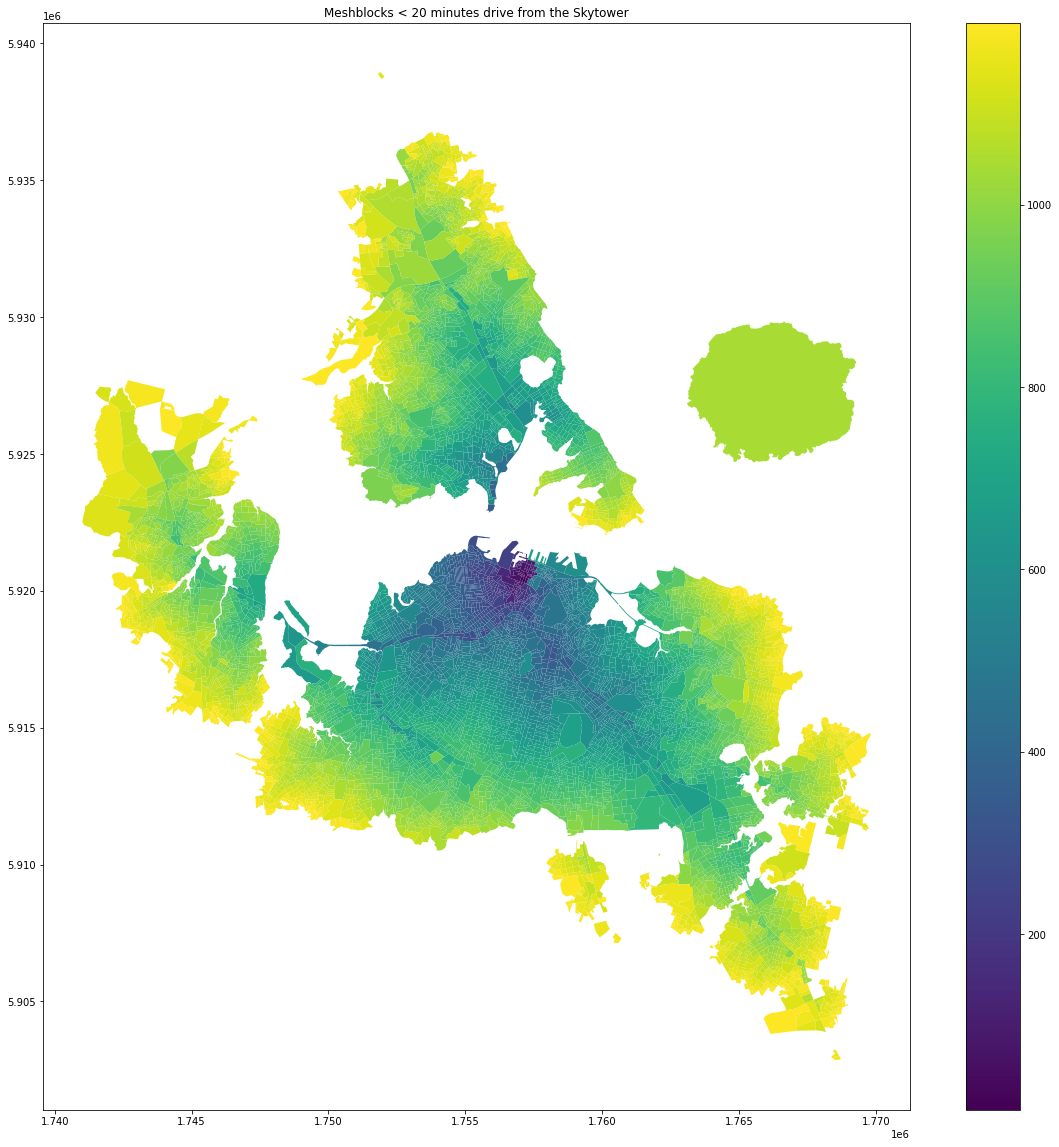

In [ ]:
mb[mb.Mtime_skytower < 60*20].plot(column="Mtime_skytower", legend=True)
plt.title("Meshblocks < 20 minutes drive from the Skytower")

7.	Minimum Manhattan distance from centroid to nearest rapid transit stop (Northern busway, rail or ferry terminal). Mdist_rapid_transit
8.	Name of rapid transit stop identified above Mdist_rapid_transit_name

In [ ]:
transit = pd.read_excel("input/Geocoordinates_Direct_Transit_stops_AKL.xlsx")
transit = gpd.GeoDataFrame(transit, geometry=gpd.points_from_xy(transit.Longitude, transit.Latitude), crs="EPSG:4326")
transit

Location   Latitude   Longitude  \
0                 West Harbour -36.810902  174.645571   
1                  Hobsonville -36.787563  174.672260   
2                  Beach Haven -36.789800  174.678317   
3                   Birkenhead -36.822961  174.733882   
4                    Northcote -36.826891  174.746329   
5                    Bayswater -36.821697  174.766296   
6                  Stanley Bay -36.828009  174.781236   
7                     Downtown -36.842912  174.766930   
8                    Devonport -36.833343  174.795631   
9                     Matiatia -36.780617  174.991460   
10                Pine Harbour -36.889582  174.989955   
11               Half Moon Bay -36.879913  174.897656   
12                Gulf Harbour -36.624279  174.787779   
13                    Avondale -36.897302  174.699092   
14              Baldwin Avenue -36.877694  174.720462   
15                   Britomart -36.844177  174.767766   
16                   Ellerslie -36.898225  174.808085   
17              Fruitvale Road -36.910636  174.667006   
18                   Glen Eden -36.910149  174.652854   
19                  Glen Innes -36.878788  174.854118   
20                     Grafton -36.865501  174.770008   
21                   Greenlane -36.889649  174.797444   
22                   Henderson -36.880903  174.630923   
23                       Homai -37.013442  174.874655   
24                   Kingsland -36.872443  174.744520   
25                     Manukau -36.993769  174.877389   
26                    Manurewa -37.023261  174.896139   
27                  Meadowbank -36.866298  174.820777   
28                  Middlemore -36.963044  174.838964   
29                 Morningside -36.874913  174.735210   
30                     Mt Eden -36.867955  174.758970   
31                  Mt. Albert -36.884793  174.714007   
32                    New Lynn -36.909357  174.684020   
33                   Newmarket -36.869622  174.778879   
34                    Onehunga -36.925383  174.786012   
35                      Orakei -36.862352  174.809466   
36                     Otahuhu -36.946888  174.833261   
37                     Panmure -36.898136  174.849269   
38                  Papatoetoe -36.977583  174.849376   
39                    Papakura -37.064926  174.946311   
40                     Parnell -36.854689  174.777457   
41                     Penrose -36.910093  174.815687   
42                     Puhinui -36.989788  174.856028   
43                    Pukekohe -37.203246  174.910155   
44                       Ranui -36.867874  174.603303   
45                     Remuera -36.881313  174.785404   
46                Sturges Road -36.873433  174.620874   
47                   Sunnyvale -36.896779  174.631982   
48                     Swanson -36.866032  174.576258   
49                 Sylvia Park -36.914619  174.842589   
50                    Takanini -37.041127  174.919446   
51                    Te Mahia -37.031118  174.906152   
52                   Te Papapa -36.920079  174.801432   
53  Hibiscus Coast Bus Station -36.624647  174.667158   
54   Constellation Bus Station -36.752014  174.728166   
55       Sunnynook Bus Station -36.761481  174.737999   
56     Smales Farm Bus Station -36.784523  174.751077   
57        Akoranga Bus Station -36.797232  174.760938   

                       geometry  
0   POINT (174.64557 -36.81090)  
1   POINT (174.67226 -36.78756)  
2   POINT (174.67832 -36.78980)  
3   POINT (174.73388 -36.82296)  
4   POINT (174.74633 -36.82689)  
5   POINT (174.76630 -36.82170)  
6   POINT (174.78124 -36.82801)  
7   POINT (174.76693 -36.84291)  
8   POINT (174.79563 -36.83334)  
9   POINT (174.99146 -36.78062)  
10  POINT (174.98996 -36.88958)  
11  POINT (174.89766 -36.87991)  
12  POINT (174.78778 -36.62428)  
13  POINT (174.69909 -36.89730)  
14  POINT (174.72046 -36.87769)  
15  POINT (174.76777 -36.84418)  
16  POINT (174.80809 -36.89822)  
17  POINT (174.66701 -36.91064)  
18  POINT (1

In [ ]:
len(mb)

13441

In [ ]:
%%time
def drive(from_points, to_points):
    # Drive distance and time these meshblock centroids to all 58 rapid transit stops
    from_points_s = ";".join([f"{point.x},{point.y}" for point in from_points])
    from_indices = ";".join([str(i) for i in range(len(from_points))])
    to_points_s = ";".join([f"{point.x},{point.y}" for point in to_points])
    to_indices = ";".join([str(i + len(from_points)) for i in range(len(to_points))])
    result = requests.get(f"{BASE_URL}/table/v1/driving/{from_points_s};{to_points_s}?sources={from_indices}&destinations={to_indices}&annotations=duration,distance")
    return result.json()
result = drive(from_points=mb.centroid.to_crs(epsg=4326), to_points=transit.geometry.to_crs(epsg=4326))

CPU times: user 1.76 s, sys: 42.1 ms, total: 1.8 s
Wall time: 32.8 s


In [ ]:
min_indices = np.argmin(result["distances"], axis=1)
mb["Mdist_rapid_transit"] = [result["distances"][i][min_indices[i]] for i in range(len(min_indices))]
mb["Mtime_rapid_transit"] = [result["durations"][i][min_indices[i]] for i in range(len(min_indices))]
mb["Mdist_rapid_transit_name"] = list(transit.Location[min_indices])

In [ ]:
mb.Mdist_rapid_transit_name.value_counts()

Constellation Bus Station     1006
Hibiscus Coast Bus Station     862
Half Moon Bay                  718
Pukekohe                       515
Manukau                        503
Papakura                       499
Glen Innes                     424
Onehunga                       420
Manurewa                       378
Kingsland                      371
Mt. Albert                     346
West Harbour                   332
Glen Eden                      326
Middlemore                     314
Avondale                       304
Henderson                      288
Papatoetoe                     286
Fruitvale Road                 248
Britomart                      246
Otahuhu                        246
Morningside                    227
Beach Haven                    223
Akoranga Bus Station           223
Sunnyvale                      219
Sylvia Park                    218
Mt Eden                        216
Smales Farm Bus Station        214
Ranui                          208
New Lynn            

<AxesSubplot:>

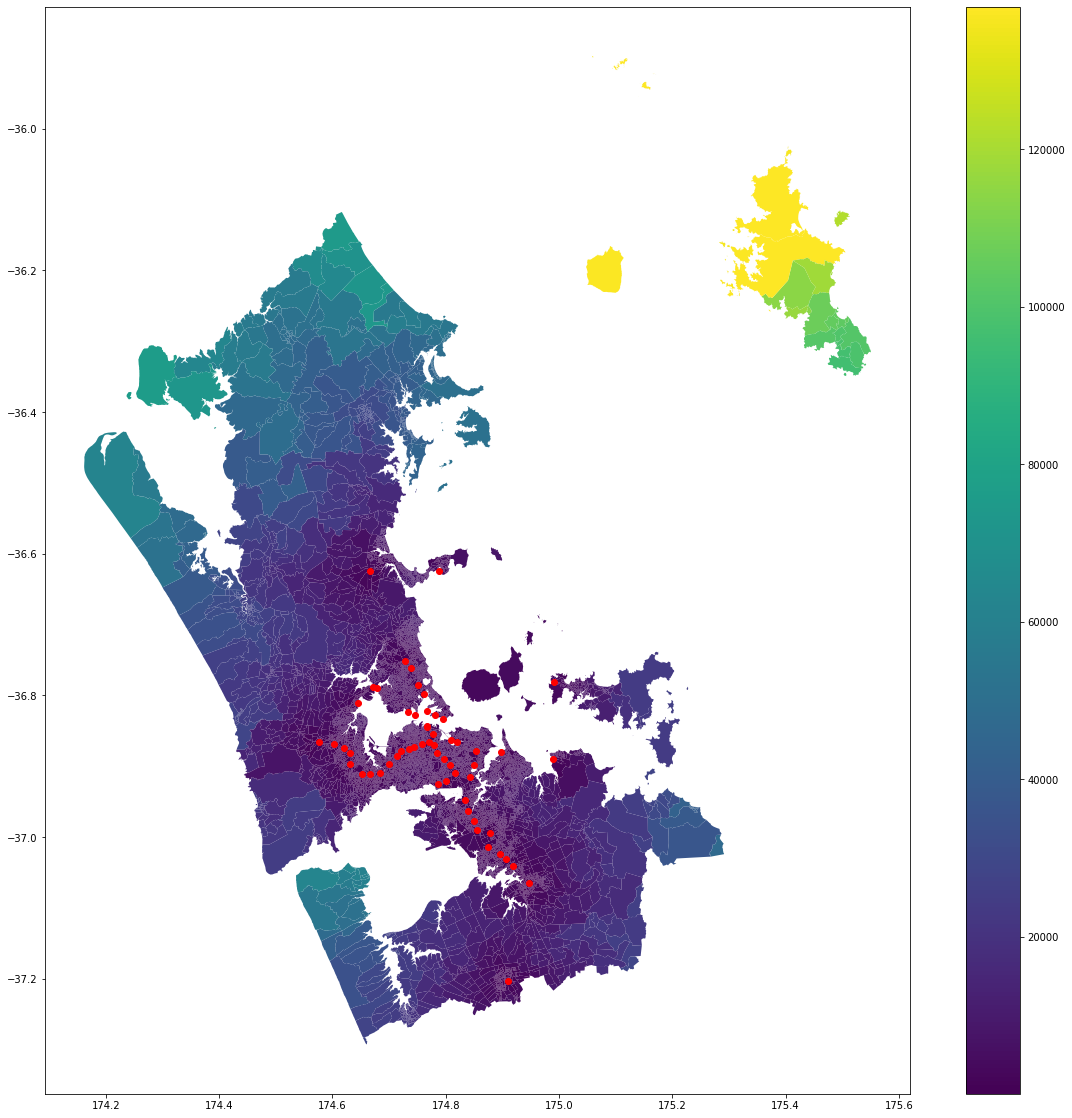

In [ ]:
ax = mb.to_crs(transit.crs).plot(column="Mdist_rapid_transit", legend=True)
transit.plot(ax=ax, color="red")

<AxesSubplot:>

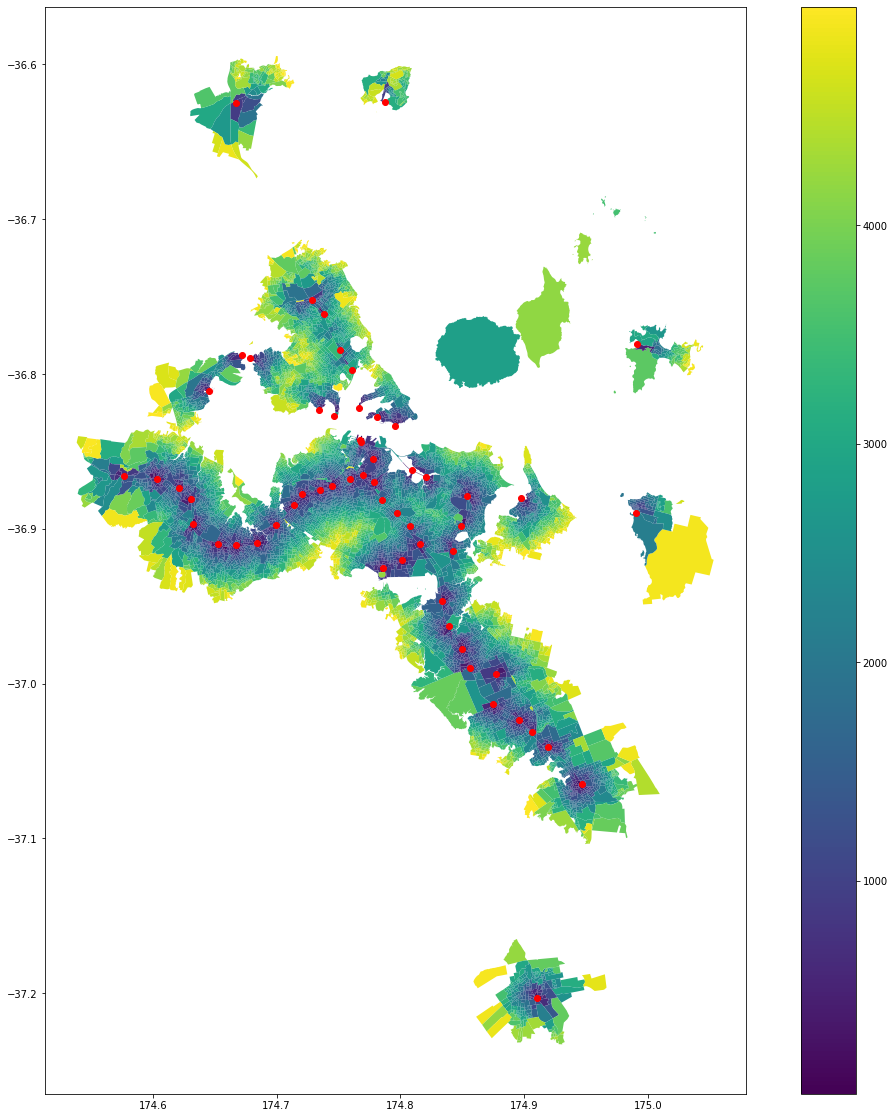

In [ ]:
ax = mb[mb.Mdist_rapid_transit < 5000].to_crs(transit.crs).plot(column="Mdist_rapid_transit", legend=True)
transit.plot(ax=ax, color="red")

9.	Manhattan distance from centroid to nearest motorway on-ramp Mdist_onramp
10.	Name or other identifier of motorway onramp identified above Mdist_onramp_name

In [ ]:
onramps = gpd.read_file("input/kx-nz-state-highway-on-ramps-off-ramps-SHP.zip")
onramps = gpd.clip(onramps.to_crs(mb.crs), mb)
onramps

ID ROADID   SH INTERCHANG DISPLACEME RAMPNO  LENGTH  \
1        288.0    288  020       0019       0.00      1    37.0   
2        251.0    251  016       0027       0.00      1   155.0   
5        291.0    291  020       0022       0.00      1   203.0   
34      1765.0   1765  020       0002       0.00      1   414.0   
35      2623.0   2623  01N       2036       0.00      1   337.0   
..         ...    ...  ...        ...        ...    ...     ...   
437  6297867.0   3101  018       0005       None      1   313.0   
438  6297864.0   3106  018       0002       None      4   263.0   
439  6297838.0   3086  016       0100       None      2   843.0   
440  6297836.0   3088  016       0002       None      4   437.0   
446  6298167.0   3253  016       0019       None      3    68.0   

                     DESCRIPTIO  \
1           020-0010/03.65-D-ON   
2          016-0007/04.01-I-OFF   
5           020-0010/02.28-I-ON   
34         020-0010/04.77-I-OFF   
35   01N-2398/12.36-X410-R3-OFF   
..                          ...   
437                 018-0005-R1   
438                 018-0002-R4   
439                 016-0003-R2   
440         016-0002-R4 TEMP ON   
446                 016-0019-R3   

                                              geometry  
1    LINESTRING (1758742.502 5911581.839, 1758734.3...  
2    LINESTRING (1747446.038 5919555.363, 1747389.5...  
5    LINESTRING (1759420.418 5910233.008, 1759414.2...  
34   LINESTRING (1757782.109 5912150.461, 1757752.3...  
35   LINESTRING (1753039.078 5934634.671, 1753012.1...  
..                                                 ...  
437  LINESTRING (1750624.813 5929454.552, 1750604.6...  
438  LINESTRING (1752046.399 5930728.423, 1752081.5...  
439  LINESTRING (1756829.783 5919210.950, 1756778.7...  
440  LINESTRING (1757567.004 5919997.142, 1757604.0...  
446  LINESTRING (1743974.769 5923934.492, 1743962.0...  

[256 rows x 9 columns]

In [ ]:
# Filter out offramps
onramps = onramps[~onramps.DESCRIPTIO.str.contains("OFF")]
onramps

ID ROADID   SH INTERCHANG DISPLACEME RAMPNO  LENGTH  \
1        288.0    288  020       0019       0.00      1    37.0   
5        291.0    291  020       0022       0.00      1   203.0   
37      2622.0   2622  01N       2035       0.00      1    98.0   
38       258.0    258  016       0034       0.00      1   240.0   
39      1981.0   1981  01N       2018       0.00      1   352.0   
..         ...    ...  ...        ...        ...    ...     ...   
437  6297867.0   3101  018       0005       None      1   313.0   
438  6297864.0   3106  018       0002       None      4   263.0   
439  6297838.0   3086  016       0100       None      2   843.0   
440  6297836.0   3088  016       0002       None      4   437.0   
446  6298167.0   3253  016       0019       None      3    68.0   

                    DESCRIPTIO  \
1          020-0010/03.65-D-ON   
5          020-0010/02.28-I-ON   
37   01N-2398/13.96-X412-R4-ON   
38         016-0007/06.43-I-ON   
39   01N-2398/15.45-X414-R4-ON   
..                         ...   
437                018-0005-R1   
438                018-0002-R4   
439                016-0003-R2   
440        016-0002-R4 TEMP ON   
446                016-0019-R3   

                                              geometry  
1    LINESTRING (1758742.502 5911581.839, 1758734.3...  
5    LINESTRING (1759420.418 5910233.008, 1759414.2...  
37   LINESTRING (1753301.310 5933060.772, 1753303.1...  
38   LINESTRING (1745470.285 5920590.583, 1745458.7...  
39   LINESTRING (1754036.875 5931380.043, 1753985.1...  
..                                                 ...  
437  LINESTRING (1750624.813 5929454.552, 1750604.6...  
438  LINESTRING (1752046.399 5930728.423, 1752081.5...  
439  LINESTRING (1756829.783 5919210.950, 1756778.7...  
440  LINESTRING (1757567.004 5919997.142, 1757604.0...  
446  LINESTRING (1743974.769 5923934.492, 1743962.0...  

[173 rows x 9 columns]

<AxesSubplot:>

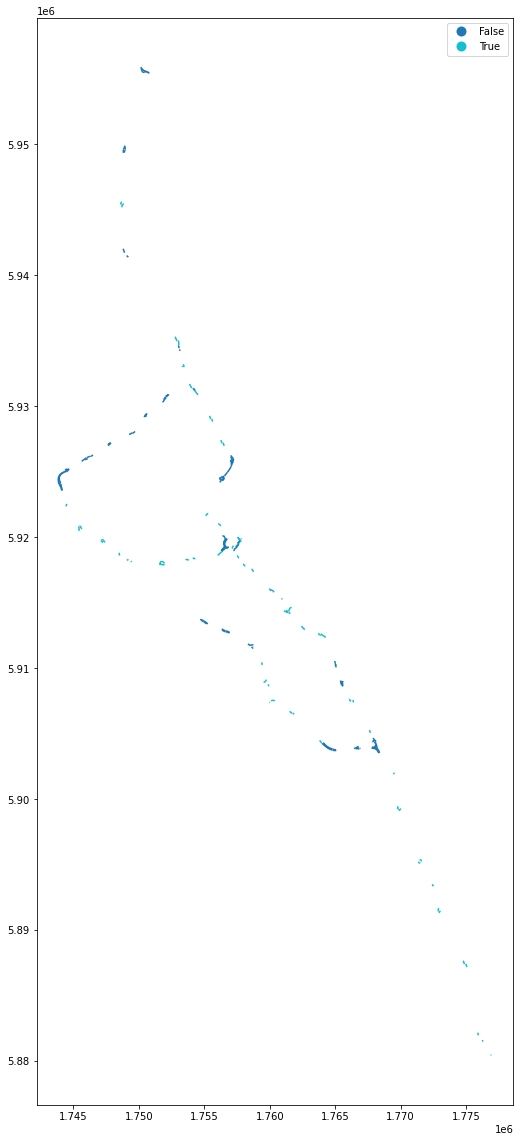

In [ ]:
onramps["has_on"] = onramps.DESCRIPTIO.str.contains("ON").astype(str)
onramps.plot(column="has_on", legend=True)

In [ ]:
%%time
result = drive(from_points=mb.centroid.to_crs(epsg=4326), to_points=onramps.centroid.to_crs(epsg=4326))

CPU times: user 2.27 s, sys: 89.3 ms, total: 2.36 s
Wall time: 1min 5s


In [ ]:
len(result["distances"]), len(result["distances"][0])

(13441, 173)

In [ ]:
min_indices = np.argmin(result["distances"], axis=1)
mb["Mdist_onramp"] = [result["distances"][i][min_indices[i]] for i in range(len(min_indices))]
mb["Mtime_onramp"] = [result["durations"][i][min_indices[i]] for i in range(len(min_indices))]
mb["Mdist_onramp_name"] = list(onramps.DESCRIPTIO.iloc[min_indices])

In [ ]:
mb.Mdist_onramp_name.value_counts()

01N-2431/07.16-X438-R4-ON    719
016-0007/04.39-I-ON          663
01N-0434-R6                  575
01N-2431/13.34-X444-R2-ON    560
016-0007/06.46-I-ON1         487
                            ... 
016-0019-R2                    1
01N-2398/15.45-X414-R4-ON      1
018-0008-R1                    1
01N-0389-R4                    1
016-0000/08.53-X8-R4-ON        1
Name: Mdist_onramp_name, Length: 115, dtype: int64

<AxesSubplot:>

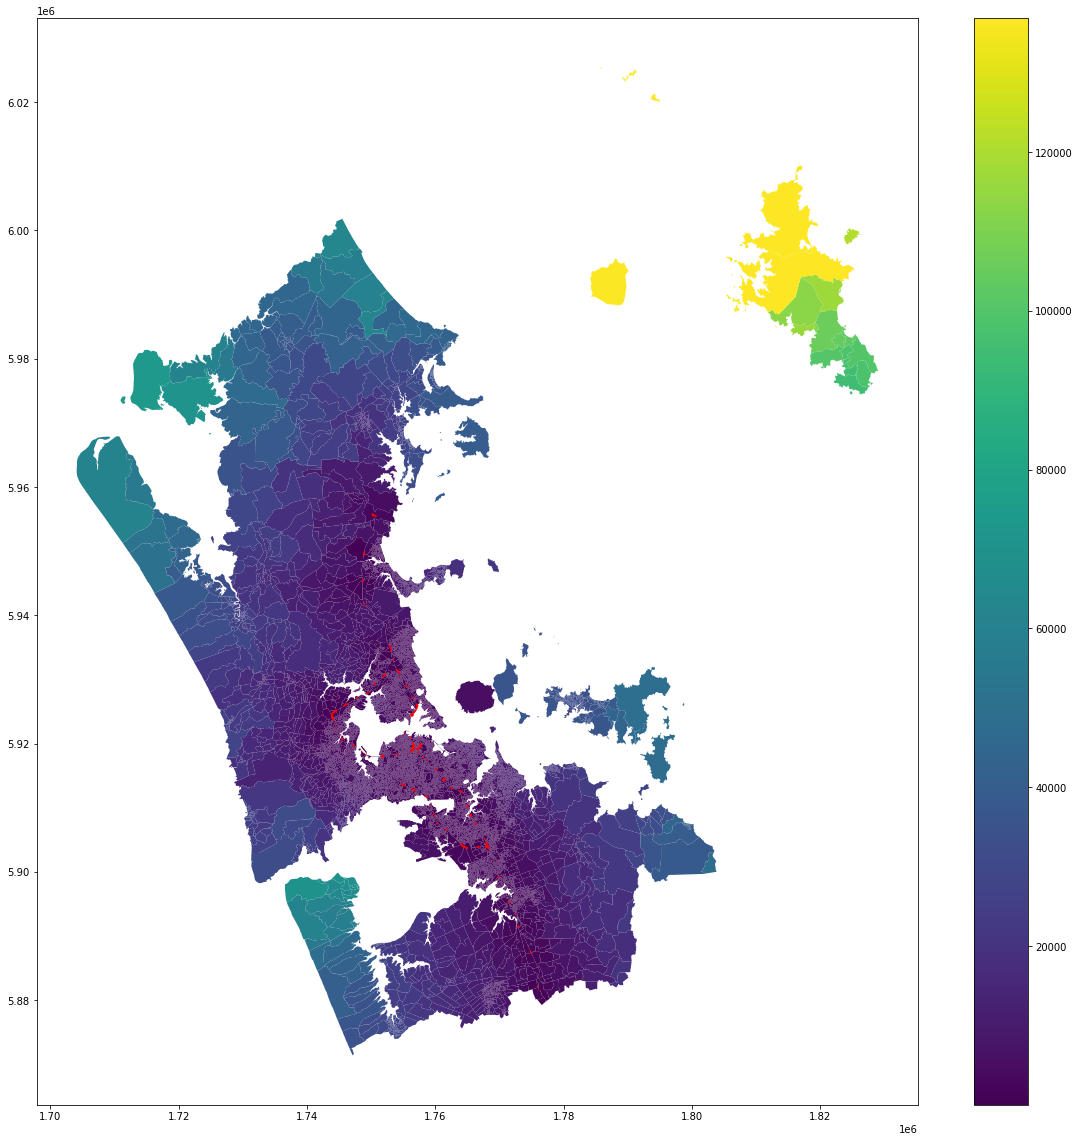

In [ ]:
ax = mb.plot(column="Mdist_onramp", legend=True)
onramps.plot(ax=ax, color="red")

<AxesSubplot:>

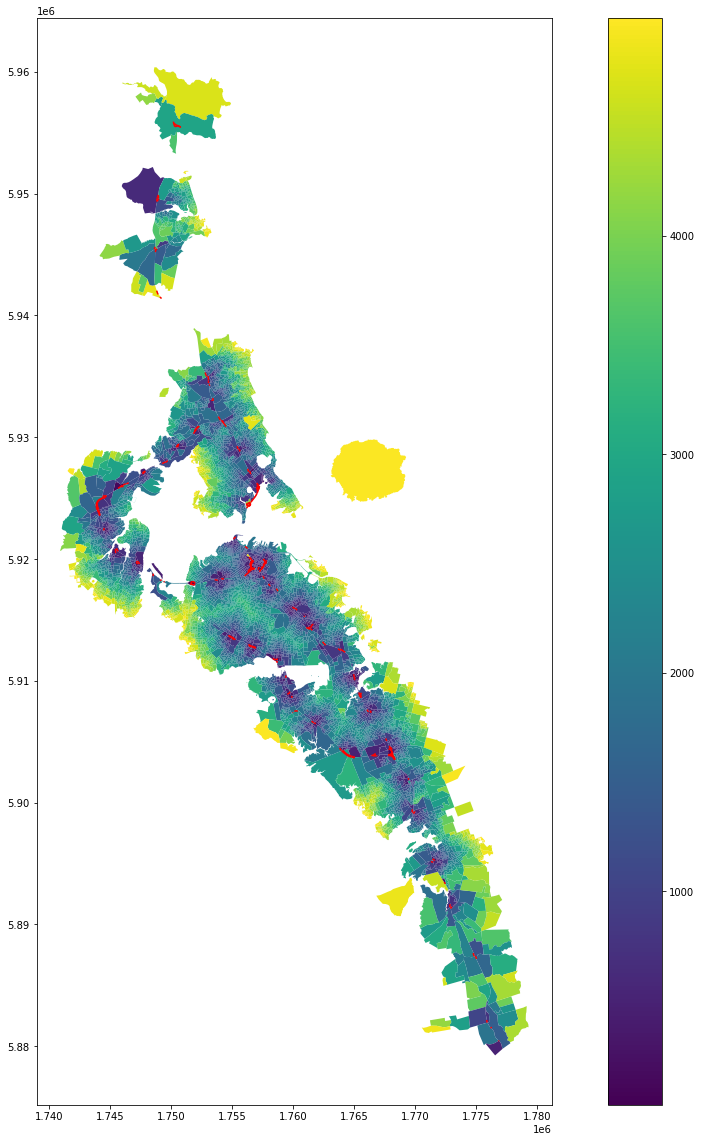

In [ ]:
ax = mb[mb.Mdist_onramp < 5000].plot(column="Mdist_onramp", legend=True)
onramps.plot(ax=ax, color="red")

11.	Indicator (0 or 1) for whether the meshblock is on coastline Coast_indicator

In [ ]:
coastline = gpd.read_file("input/lds-nz-coastlines-and-islands-polygons-topo-150k-FGDB.zip!nz-coastlines-and-islands-polygons-topo-150k.gdb")

In [ ]:
%%time
coastline = gpd.clip(coastline, mb.dissolve().envelope)

CPU times: user 17.3 s, sys: 0 ns, total: 17.3 s
Wall time: 17.3 s


CPU times: user 1min 18s, sys: 88.6 ms, total: 1min 18s
Wall time: 1min 18s


<AxesSubplot:>

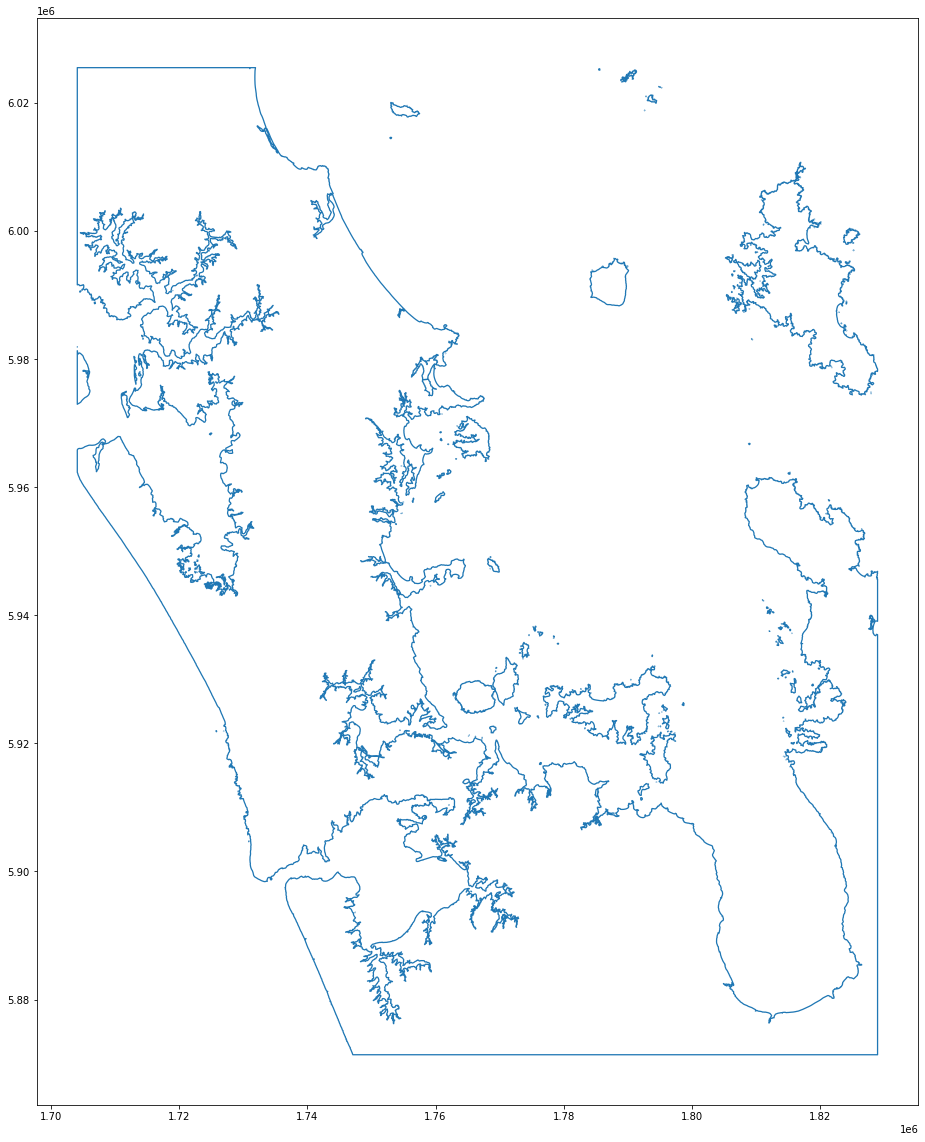

In [ ]:
%%time
coastline = coastline.dissolve().boundary.buffer(100)
coastline.plot()

In [ ]:
coastline = coastline.iloc[0]

In [ ]:
%%time
mb["Coast_indicator"] = mb.geometry.progress_apply(lambda poly: poly.intersects(coastline))

  0%|          | 0/13441 [00:00<?, ?it/s]

CPU times: user 55min 24s, sys: 2.19 s, total: 55min 26s
Wall time: 55min 21s


<AxesSubplot:>

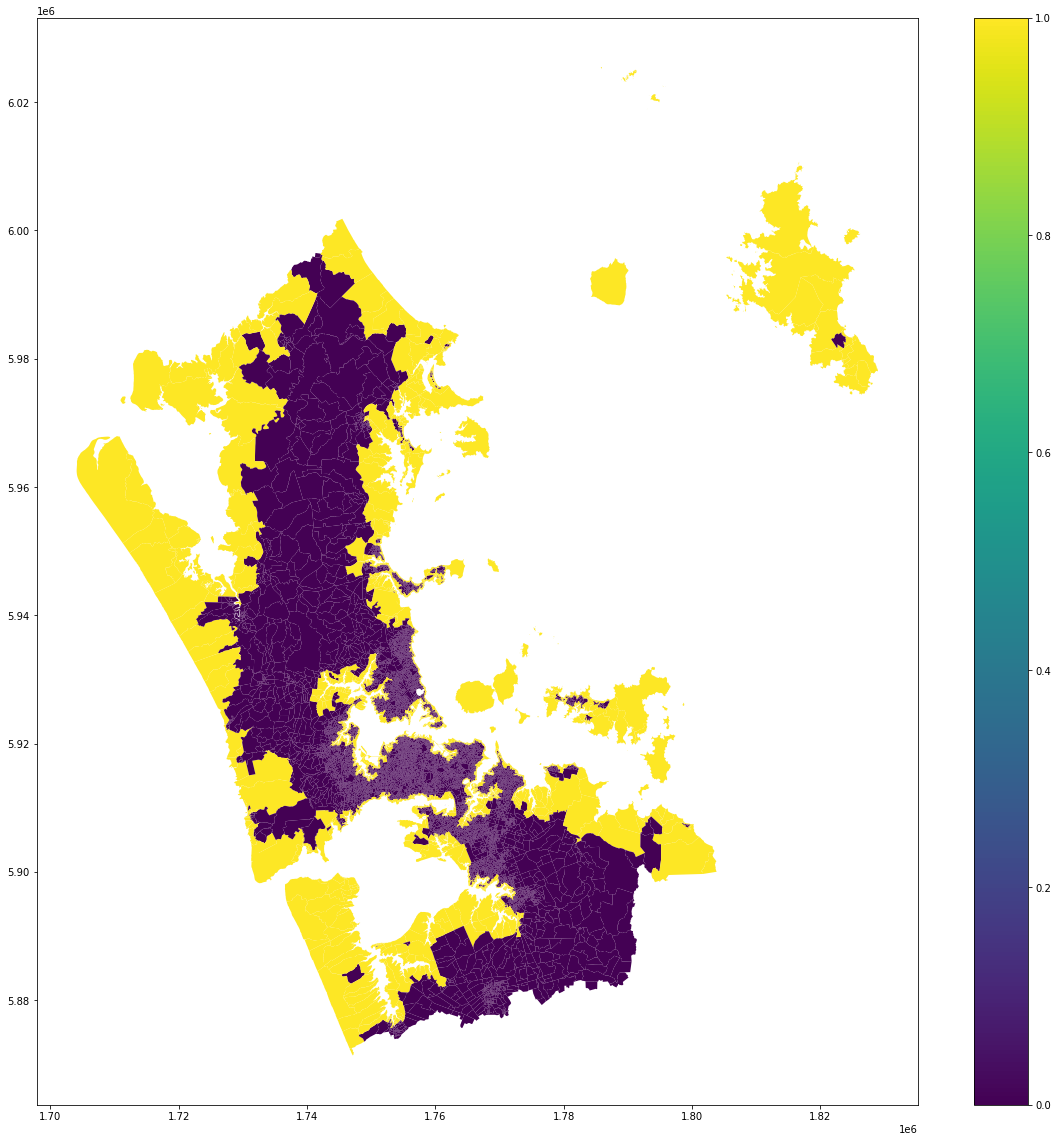

In [ ]:
mb.plot(column="Coast_indicator", legend=True)

12.	Total population from 2018 census Census2018_population

In [ ]:
# Note that this is meshblock 2020, which is not ideal, but there doesn't seem to be any changes in the Auckland region between 2018 and 2020, so it's probably fine
pop = pd.read_csv("input/2018-census-electoral-population-meshblock-2020-data.csv", index_col=0)
pop

General_Electoral_Population  Maori_Electoral_Population  \
MB2020_V2_00                                                             
100                                   -999                           9   
200                                      9                          66   
300                                     12                          48   
400                                      6                           9   
501                                   -999                        -999   
...                                    ...                         ...   
4012026                                 24                        -999   
4012027                                108                           6   
4012028                                 57                        -999   
4012029                               -999                        -999   
4012030                               -999                        -999   

              GED2020_V1_00  GED2020_V1_00_NAME GED2020_V1_00_NAME_ASCII  \
MB2020_V2_00                                                               
100                      32           Northland                Northland   
200                      32           Northland                Northland   
300                      32           Northland                Northland   
400                      32           Northland                Northland   
501                      32           Northland                Northland   
...                     ...                 ...                      ...   
4012026                  60  Wellington Central       Wellington Central   
4012027                  56             Waikato                  Waikato   
4012028                  51               Taupō                    Taupo   
4012029                  47              Taieri                   Taieri   
4012030                   8             Dunedin                  Dunedin   

              MED2020_V1_00 MED2020_V1_00_NAME MED2020_V1_00_NAME_ASCII  \
MB2020_V2_00                                                              
100                       5     Te Tai Tokerau           Te Tai Tokerau   
200                       5     Te Tai Tokerau           Te Tai Tokerau   
300                       5     Te Tai Tokerau           Te Tai Tokerau   
400                       5     Te Tai Tokerau           Te Tai Tokerau   
501                       5     Te Tai Tokerau           Te Tai Tokerau   
...                     ...                ...                      ...   
4012026                   6       Te Tai Tonga             Te Tai Tonga   
4012027                   1    Hauraki-Waikato          Hauraki-Waikato   
4012028                   1    Hauraki-Waikato          Hauraki-Waikato   
4012029                   6       Te Tai Tonga             Te Tai Tonga   
4012030                   6       Te Tai Tonga             Te Tai Tonga   

              LAND_AREA_SQ_KM   AREA_SQ_KM  
MB2020_V2_00                                
100                157.497825   157.497825  
200                120.503770   120.503770  
300                  7.481859     7.481859  
400                 83.342952    83.342952  
501                  0.000000    63.825713  
...                       ...          ...  
4012026              8.301605     8.301605  
4012027              5.064385     5.064385  
4012028              2.612804     2.612804  
4012029              0.000000   143.908480  
4012030              0.000000  1016.346178  

[53582 rows x 10 columns]

In [ ]:
pop.General_Electoral_Population = pop.General_Electoral_Population.replace(-999, np.nan)

count    12887.000000
mean       113.744859
std         63.156071
min          6.000000
25%         72.000000
50%        108.000000
75%        147.000000
max       1029.000000
Name: Census2018_population, dtype: float64

<AxesSubplot:>

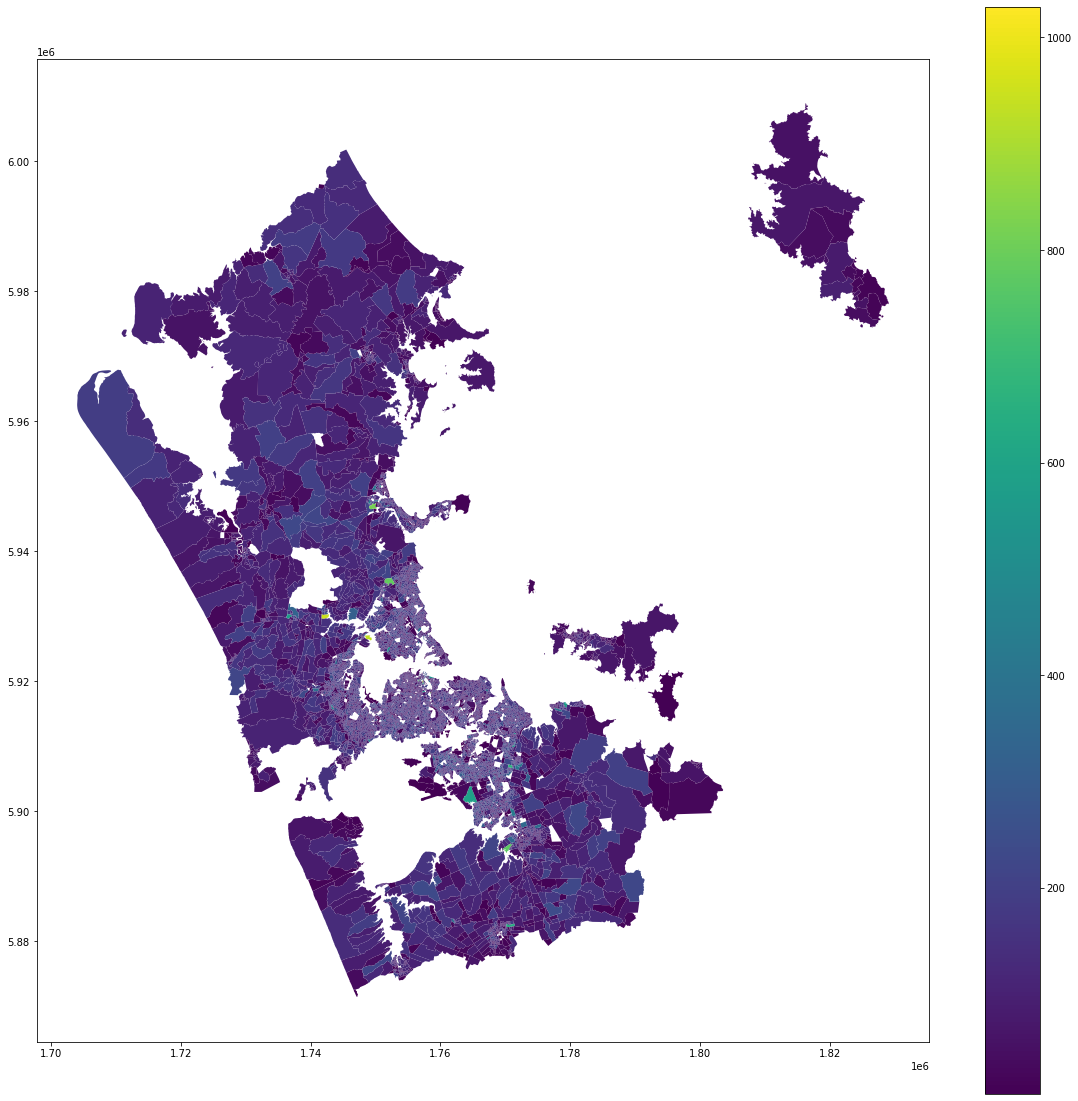

In [ ]:
mb["Census2018_population"] = list(pop.General_Electoral_Population[mb.index.astype(int)])
display(mb["Census2018_population"].describe())
mb.plot(column="Census2018_population", legend=True)

13.	Number of dwellings from 2018 census Census2018_dwellings
14.	Average Household Income from 2018 census Census2018_avg_HH_income 
15.	Median Household Income from 2018 census Census2018_med_HH_income

In [ ]:
# Can't do this one due to missing data

In [ ]:
mb

SA12018_V1_00 SA22018_V1_00 SA22018_V1_00_NAME UR2018_V1_00  \
Code                                                                  
0137200       7001157        110400        Cape Rodney         1098   
0170700       7001317        114300       Gulf Islands         1098   
0438700       7001130        111800    Barrier Islands         1098   
0439306       7001135        111800    Barrier Islands         1109   
0439307       7001135        111800    Barrier Islands         1109   
...               ...           ...                ...          ...   
4011884       7001155        110400        Cape Rodney         1073   
4011883       7001154        110400        Cape Rodney         1098   
4011925       7009199        156900         Baverstock         1108   
4011971       7009313        158600      Ormiston East         1108   
4011972       7009335        158900    Tuscany Heights         1108   

            UR2018_V1_00_NAME IUR2018_V1_00 IUR2018_V1_00_NAME CB2018_V1_00  \
Code                                                                          
0137200  Other rural Auckland            22        Rural other        07601   
0170700  Other rural Auckland            22        Rural other        07602   
0438700  Other rural Auckland            22        Rural other        07608   
0439306              Tryphena            21   Rural settlement        07608   
0439307              Tryphena            21   Rural settlement        07608   
...                       ...           ...                ...          ...   
4011884            Whangateau            21   Rural settlement        07601   
4011883  Other rural Auckland            22        Rural other        07601   
4011925              Auckland            11   Major urban area        07616   
4011971              Auckland            11   Major urban area        07616   
4011972              Auckland            11   Major urban area        07616   

                          CB2018_V1_00_NAME CON2018_V1_00  ...  \
Code                                                       ...   
0137200             Rodney Local Board Area          0299  ...   
0170700  Hibiscus and Bays Local Board Area          0299  ...   
0438700      Great Barrier Local Board Area          0299  ...   
0439306      Great Barrier Local Board Area          0299  ...   
0439307      Great Barrier Local Board Area          0299  ...   
...                                     ...           ...  ...   
4011884             Rodney Local Board Area          0299  ...   
4011883             Rodney Local Board Area          0299  ...   
4011925             Howick Local Board Area          0299  ...   
4011971             Howick Local Board Area          0299  ...   
4011972             Howick Local Board Area          0299  ...   

        Mtime_skytower_south Mtime_skytower Mdist_rapid_transit  \
Code                                                              
0137200               4741.4         4699.9             54616.0   
0170700               2432.5         2432.5             14338.0   
0438700              70462.4        70462.4            137691.6   
0439306              65818.6        65762.6             97961.5   
0439307              65724.3        65562.3             97683.6   
...                      ...            ...                 ...   
4011884               3997.2         3987.2             46452.6   
4011883               4143.4         3983.3             46892.7   
4011925               1498.7         1486.2              7873.1   
4011971               1580.3         1562.8              6404.7   
4011972               1744.1         1739.0             10376.0   

        Mtime_rapid_transit    Mdist_rapid_transit_name Mdist_onramp  \
Code                                                                   
0137200              3348.4  Hibiscus Coast Bus Station      43011.9   
0170700              1039.5  Hibiscus Coast Bus Station       6005.1   
0438700             70755.9          

In [ ]:
mb.drop(columns="geometry").to_csv("output/2018_Meshblocks.csv")